## Credit Card Fraud Detection

In this project you will predict fraudulent credit card transactions with the help of Machine learning models. Please import the following libraries to get started.

In [3]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn import preprocessing

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer

from sklearn import linear_model #import the package
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
# Importing required library
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
import matplotlib.pyplot as plt
from sklearn import linear_model #import the package

from imblearn import under_sampling 
from imblearn import over_sampling
from imblearn.over_sampling import SMOTE

from sklearn.feature_selection import RFE

from scipy.stats import norm
from matplotlib import pyplot
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import precision_recall_curve, average_precision_score, precision_score, recall_score, make_scorer, confusion_matrix
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix,roc_auc_score


import warnings
warnings.filterwarnings("ignore")

## Exploratory data analysis

In [4]:
df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


We can see that there are 28 features which are PCA transformed along with the features, 'Time', 'Amount' and 'Class'.


In [5]:
#observe the different feature type present in the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

We see that all the columns are numerical types. We might have to change the 'time' column to Datetime type and the 'class' column to a categorical type.


In [6]:
#let us observe the distribution of data
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


We can see that there is data of 284807 transactions. 

Here we will observe the distribution of our classes

In [7]:
classes=df['Class'].value_counts()
normal_share=classes[0]/df['Class'].count()*100
fraud_share=classes[1]/df['Class'].count()*100

In [8]:
print("Distribution of class=0 is ",normal_share)
print("Distribution of class=1 is ",fraud_share)

Distribution of class=0 is  99.82725143693798
Distribution of class=1 is  0.1727485630620034


We can see that 0.17 % of the data is only fraudulent. This shows that the data is highly imbalanced. 

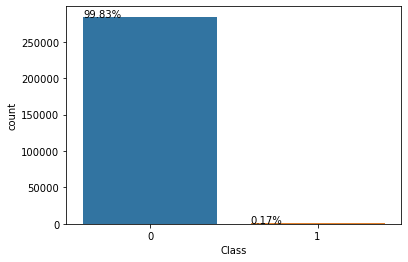

In [9]:
# Create a bar plot for the number and percentage of fraudulent vs non-fraudulent transcations
share_list=[normal_share,fraud_share]
barplt=sns.countplot(df['Class'])
i=0
for p in barplt.patches:
  width, height = p.get_width(), p.get_height()
  x, y = p.get_xy() 
  barplt.annotate('{:.2f}%'.format(share_list[i]), (x, y + height + 0.01))
  i+=1
plt.show()



We can see that 0.17 % of the data is only fraudulent. This shows that the data is highly imbalanced. 


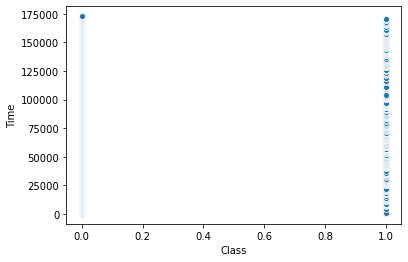

In [10]:
# Create a scatter plot to observe the distribution of classes with time
sns.scatterplot(x = 'Class', y = 'Time', data = df)
plt.show()

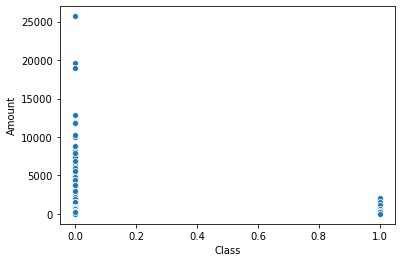

In [11]:
# Create a scatter plot to observe the distribution of classes with Amount
sns.scatterplot(x = 'Class', y = 'Amount', data = df)
plt.show()

The fraudulent transactions seems to be of an amount less than 5000.


In [12]:
# Drop unnecessary columns
#we can see that the 'time' fetaure doesn't provide any real value so we shall drop this column.
df = df.drop(['Time'], axis=1)

### Splitting the data into train & test data

In [13]:
# splitting the data into independent and dependent datas sets
y= df['Class']
X = df.drop(['Class'], axis = 1)

In [14]:
#splitting the data into test and train data sets


X_train, X_test, y_train, y_test = train_test_split(X, y,stratify = y , train_size = 0.7, test_size = 0.3, random_state = 100)

##### Preserve X_test & y_test to evaluate on the test data once you build the model

In [15]:
X_test_copy=X_test.copy()
y_test_copy=y_test.copy()
print(np.sum(y))
print(np.sum(y_train))
print(np.sum(y_test))

492
344
148


### Scaling

In [16]:
scaler = StandardScaler()
# Scaling the 'Amount' feature
X_train['Amount'] = scaler.fit_transform(X_train['Amount'].values.reshape(-1, 1))
X_test['Amount'] = scaler.transform(X_test['Amount'].values.reshape(-1, 1))

### Plotting the distribution of a variable

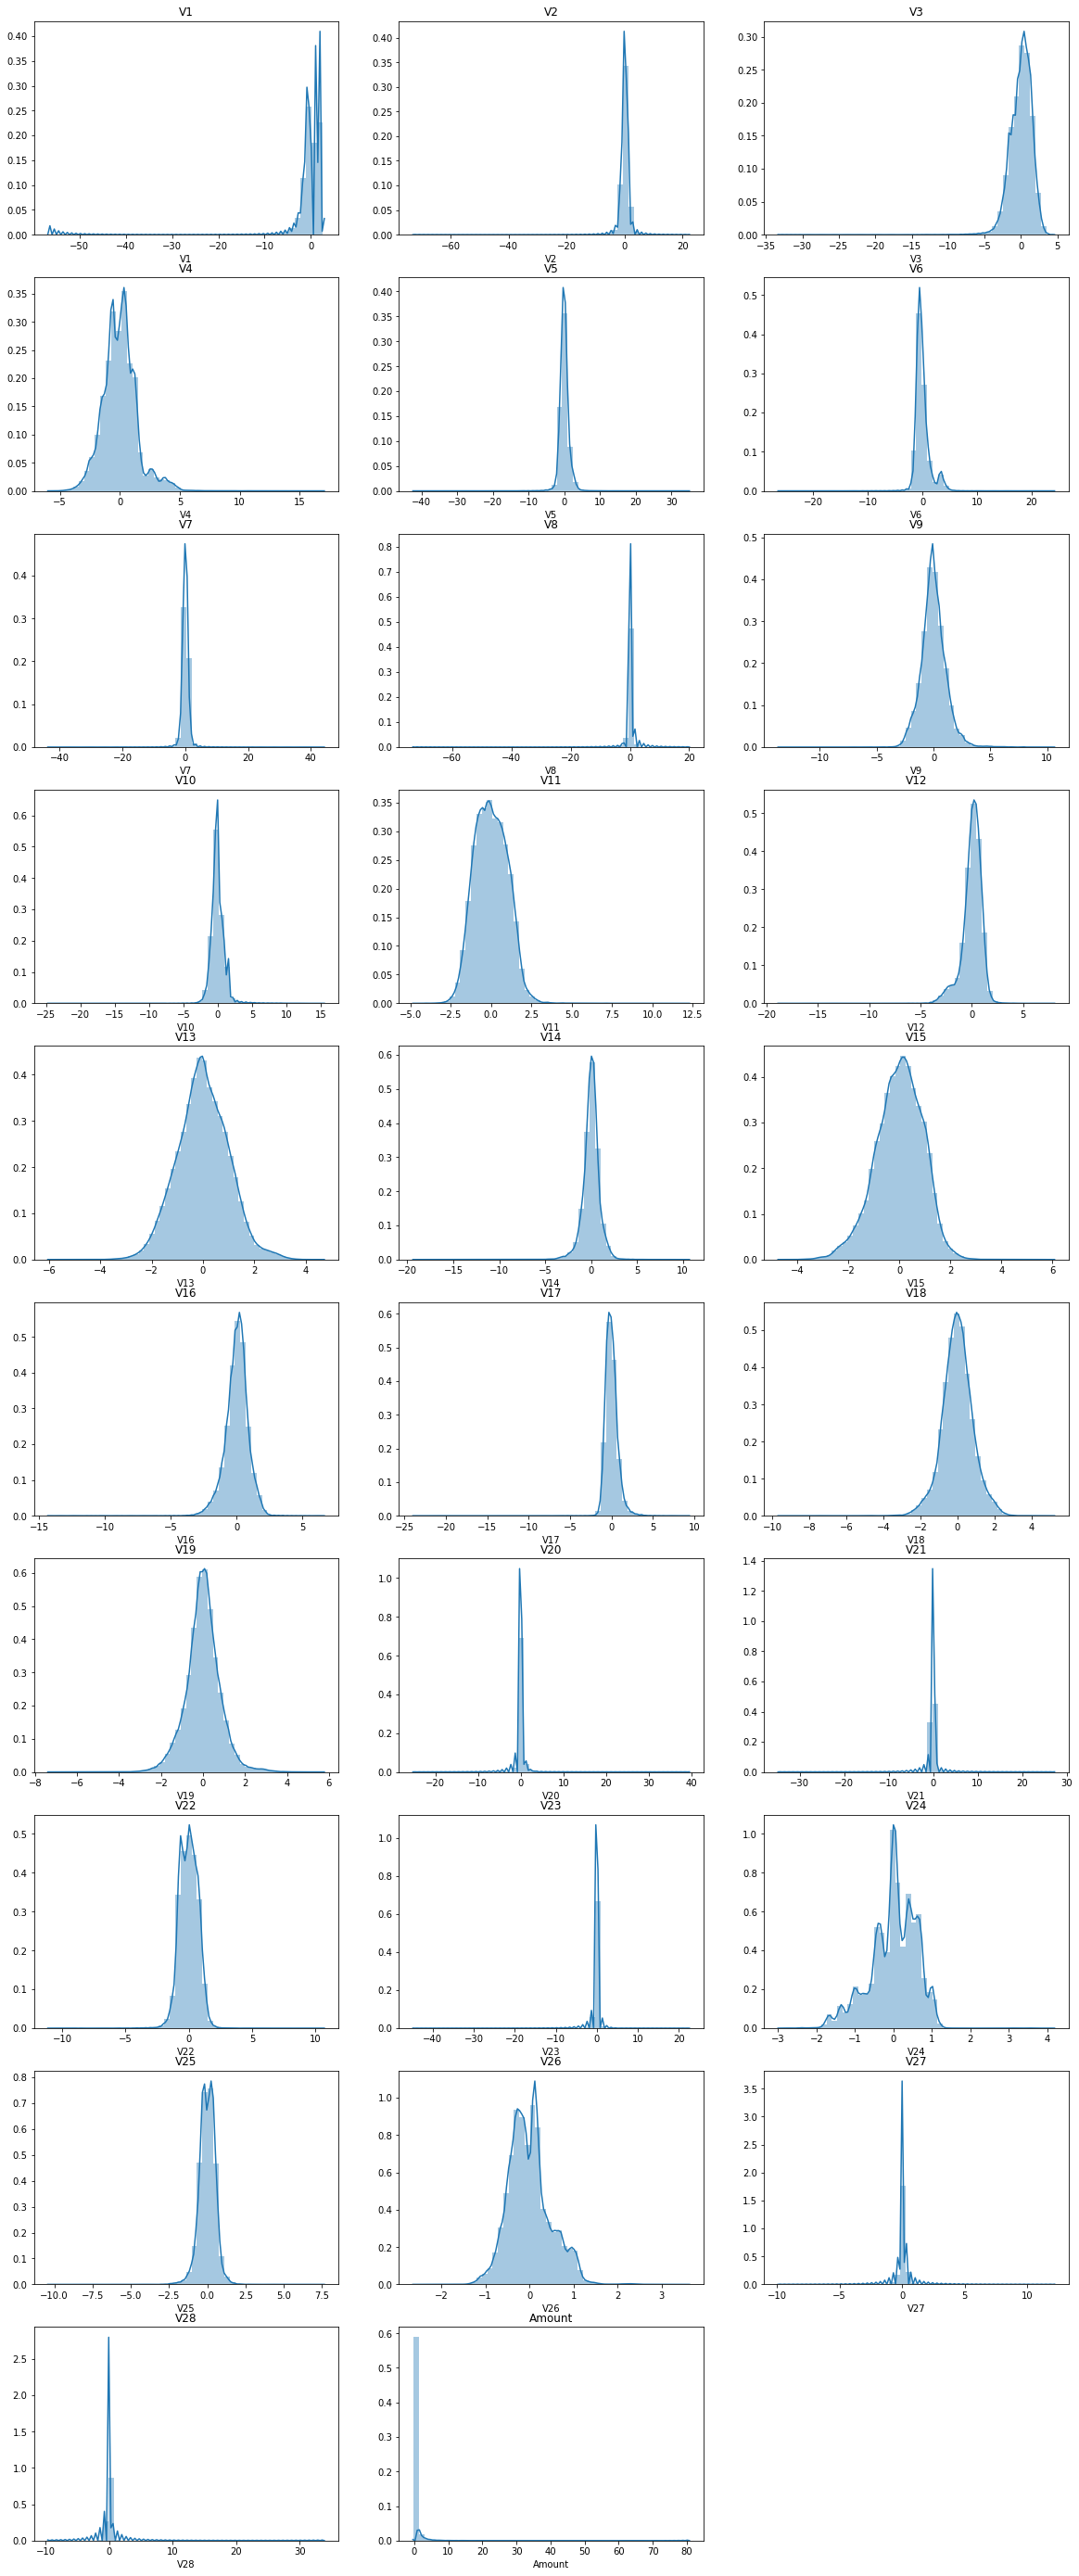

In [17]:
# plot the histogram of a variable from the dataset to see the skewness
#Let us observe the distribution of the data for some of the variables
plt.figure(figsize=(20, 50))
for n,col in enumerate(X_train.columns):
    plt.subplot(10,3,n+1)
    sns.distplot(X_train[col])
    plt.title(col)
plt.show()


We can see that from the distribution of the data above, the data is highly skewed. Hence we shall make the distribution more gaussian


In [18]:
X_train.columns

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],
      dtype='object')

In [19]:
numeric_variables=['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']
#Function to plot the distribution plot of the numeric variable list
def univariate_continuos(var_list):
    plt.figure(figsize=(20,50))
    for var in var_list:
        
        plt.subplot(10,3,var_list.index(var)+1)
        #plt.boxplot(country[var])
        sns.boxplot(y=var,palette='cubehelix', data=X_train)
    # Automatically adjust subplot params so that the subplotS fits in to the figure area.
    plt.tight_layout()
    # display the plot
    plt.show()

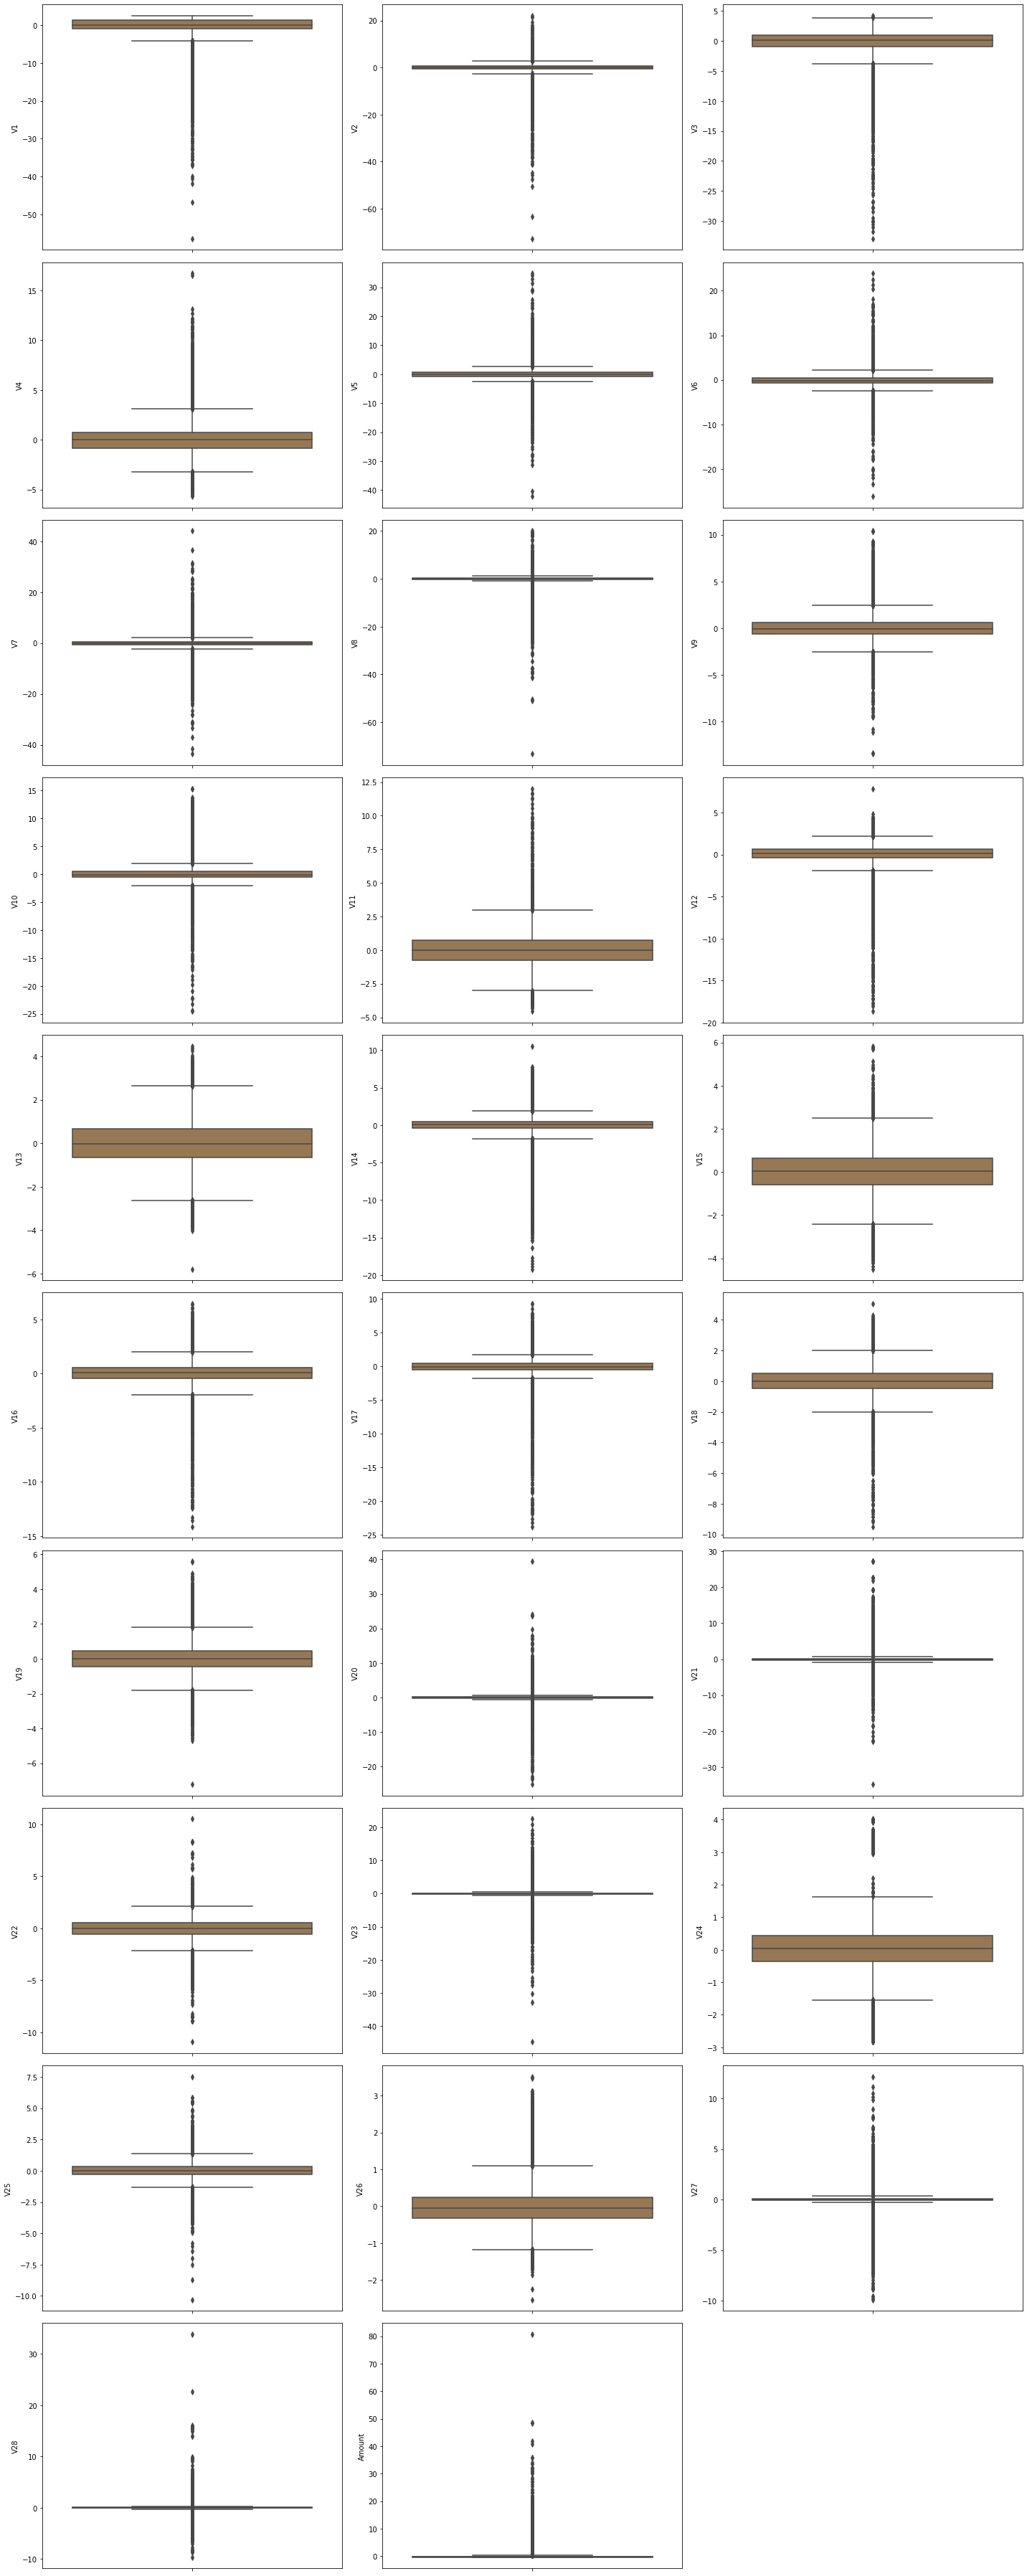

In [20]:
univariate_continuos(numeric_variables)

##### Skewness

In [21]:
X_train[numeric_variables].skew()

V1        -3.352780
V2        -4.743314
V3        -2.115044
V4         0.671234
V5        -0.335423
V6         1.213213
V7        -1.054441
V8        -9.048266
V9         0.524853
V10        1.046184
V11        0.337235
V12       -2.187217
V13        0.067930
V14       -1.913552
V15       -0.311223
V16       -1.057503
V17       -3.526079
V18       -0.248354
V19        0.116720
V20       -1.377751
V21        3.490872
V22       -0.218690
V23       -6.872356
V24       -0.540695
V25       -0.429101
V26        0.567342
V27       -2.175241
V28       13.803155
Amount    13.520470
dtype: float64

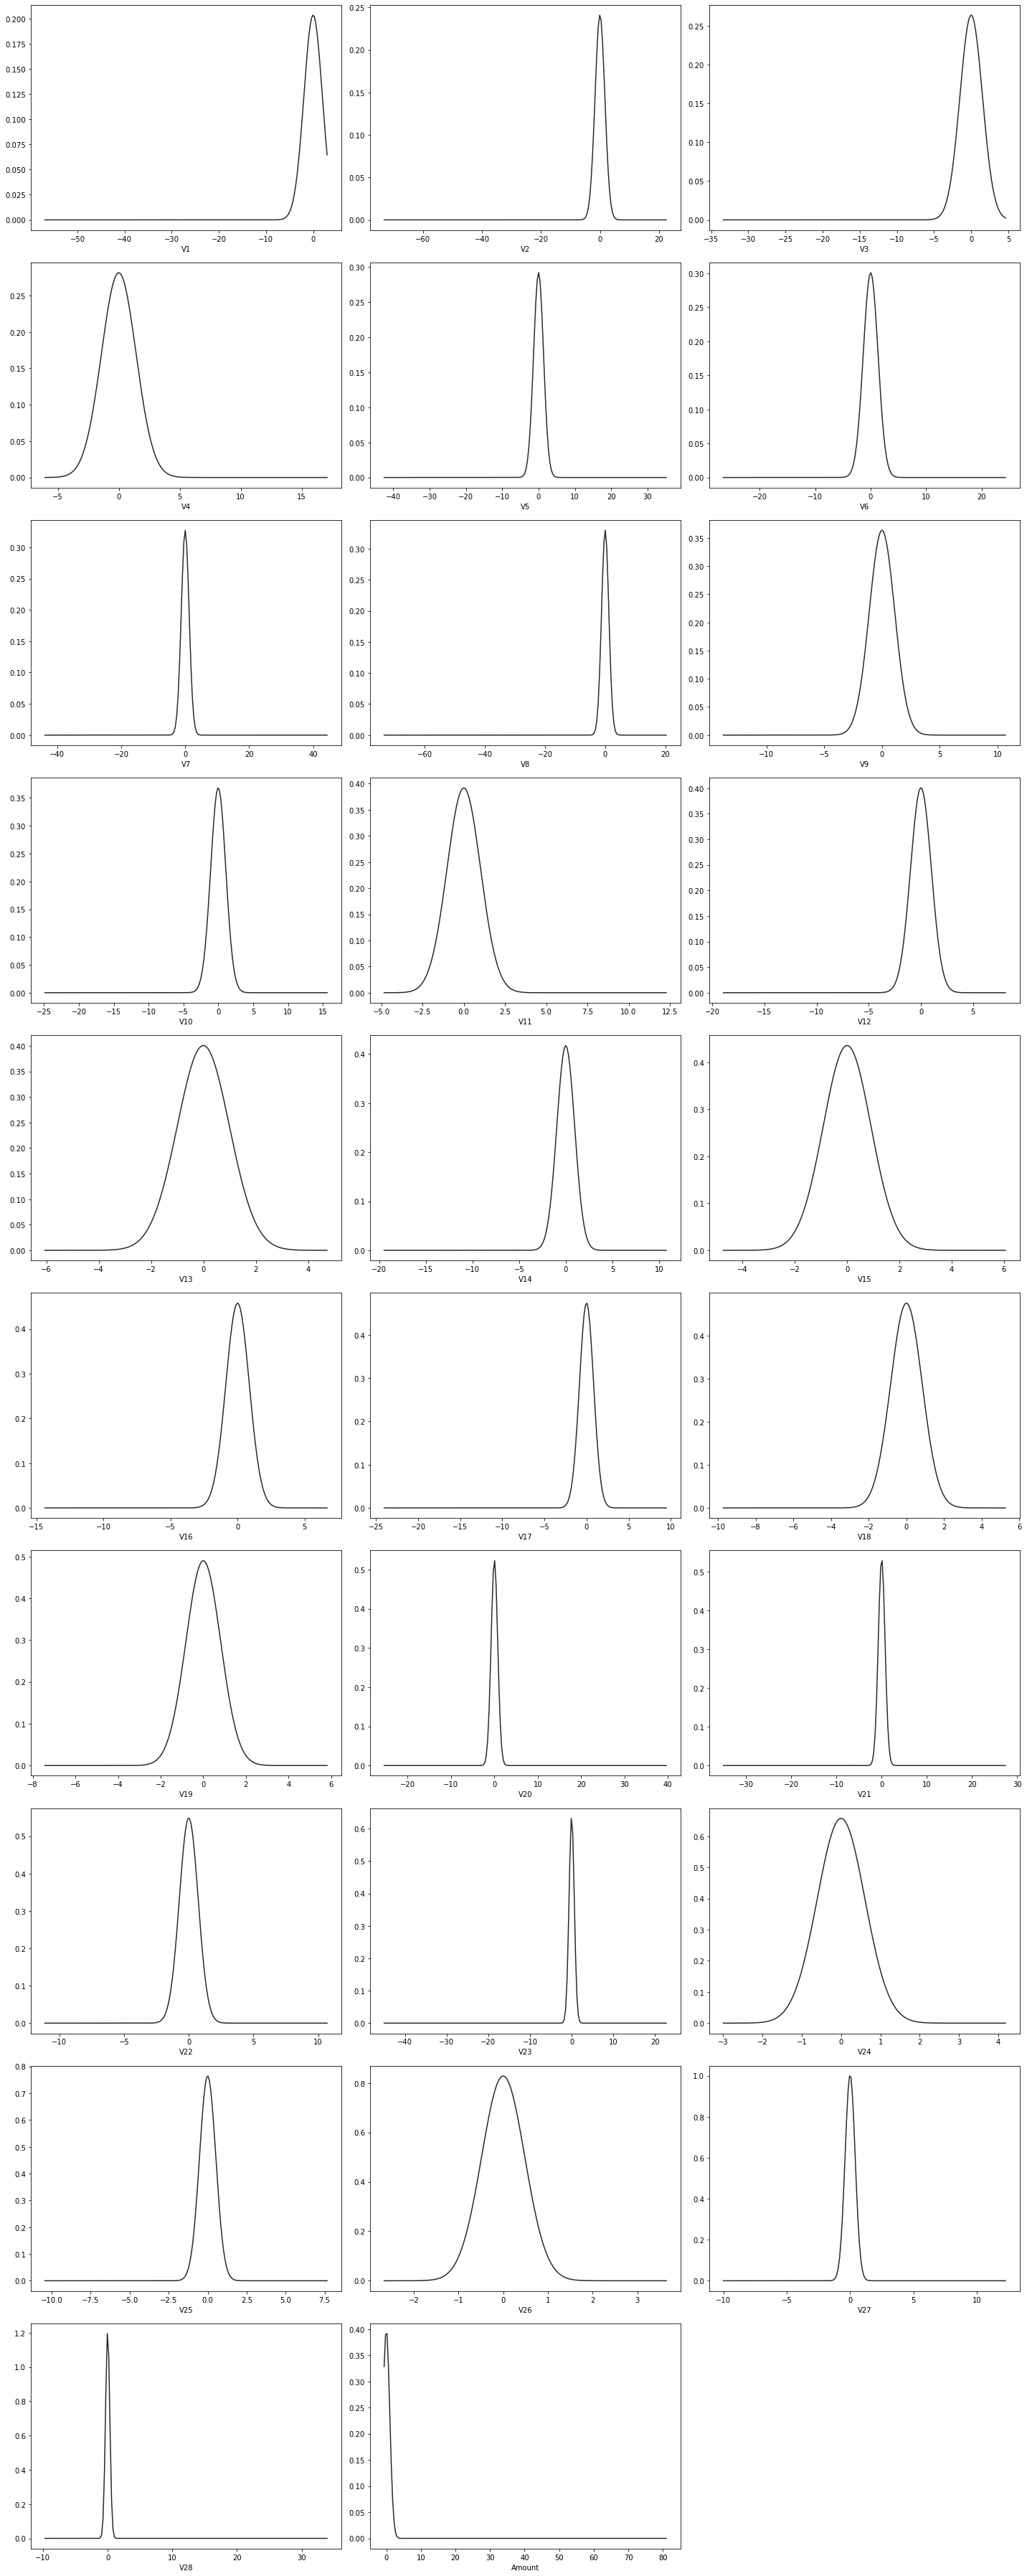

In [23]:
num_col = ['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']

#Function to plot the distribution plot of the numeric variable list
def distplots(var_list):
    plt.figure(figsize=(20,50))
    for var in var_list:
        plt.subplot(10,3,var_list.index(var)+1)
        sns.distplot(X_train[var], fit=norm, kde=False, hist=False)
        #sns.boxplot(y=var,palette='cubehelix', data=main_df)
    # Automatically adjust subplot params so that the subplotS fits in to the figure area.
    plt.tight_layout()
    # display the plot
    plt.show()
    
distplots(num_col)

### If there is skewness present in the distribution use:
- <b>Power Transformer</b> package present in the <b>preprocessing library provided by sklearn</b> to make distribution more gaussian

In [24]:
# - Apply : preprocessing.PowerTransformer(copy=False) to fit & transform the train & test data

pt = PowerTransformer()
pt.fit(X_train) 
# fit & transform the train & test data
X_train_pt = pt.fit_transform(X_train)
X_test_pt = pt.transform(X_test)

In [25]:
#Create Dataframe
X_train_pt_df = pd.DataFrame(data=X_train_pt,   columns=X_train.columns)
X_test_pt_df = pd.DataFrame(data=X_test_pt,   columns=X_test.columns)

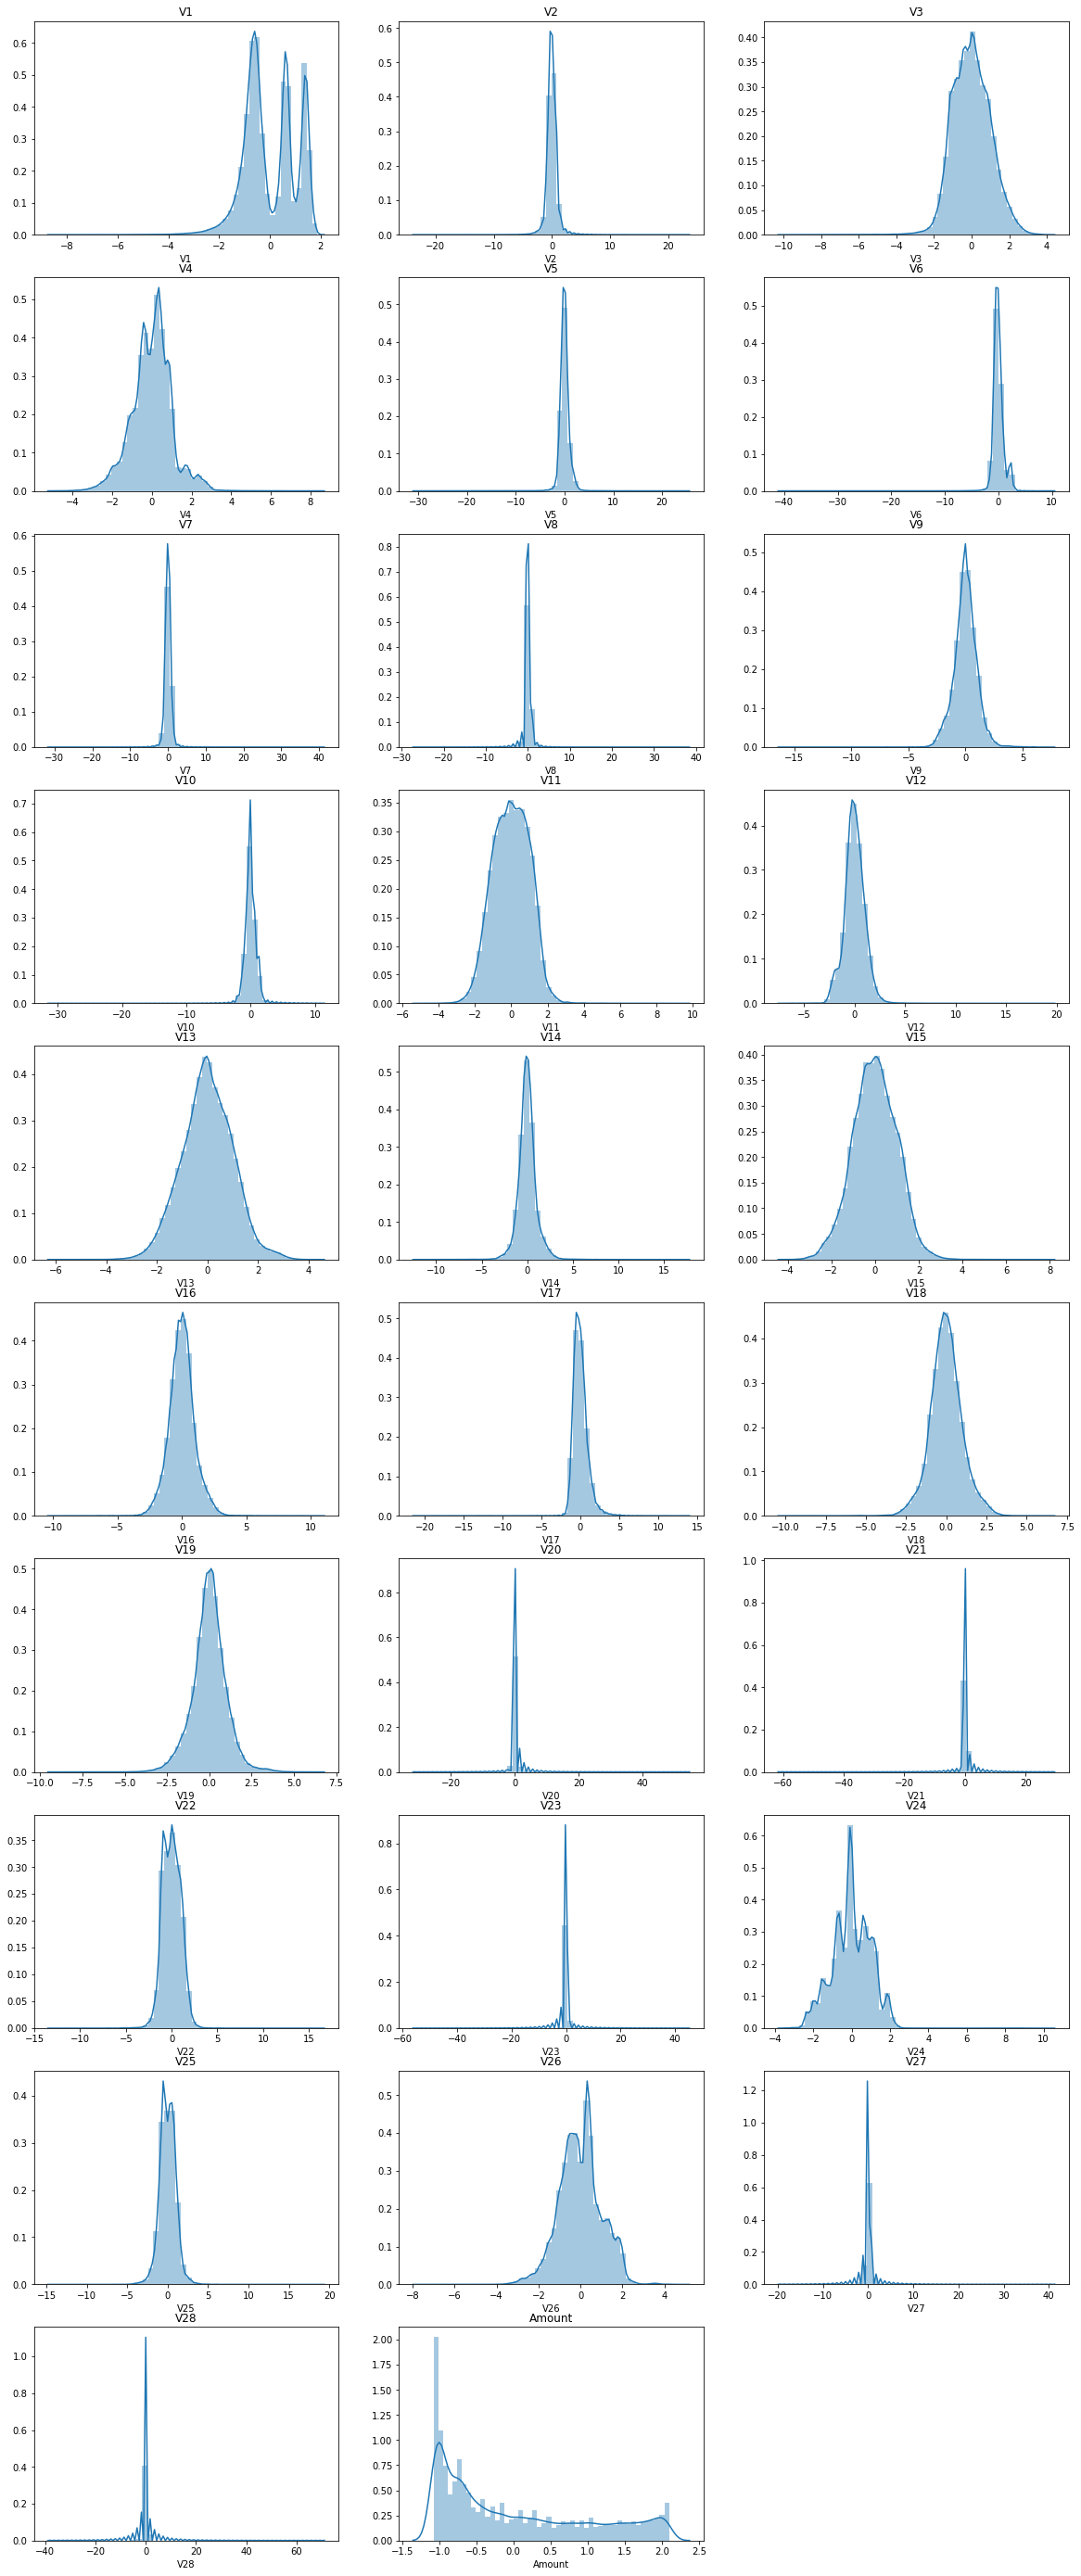

In [26]:
# plot the histogram of a variable from the dataset again to see the result 
#Let us observe the distribution of the data for the variables after power transform
plt.figure(figsize=(20, 50))
for n,col in enumerate(X_train_pt_df.columns):
    plt.subplot(10,3,n+1)
    sns.distplot(X_train_pt_df[col])
    plt.title(col)
plt.show()

We can see a small improvement in skewness after the power transformation.

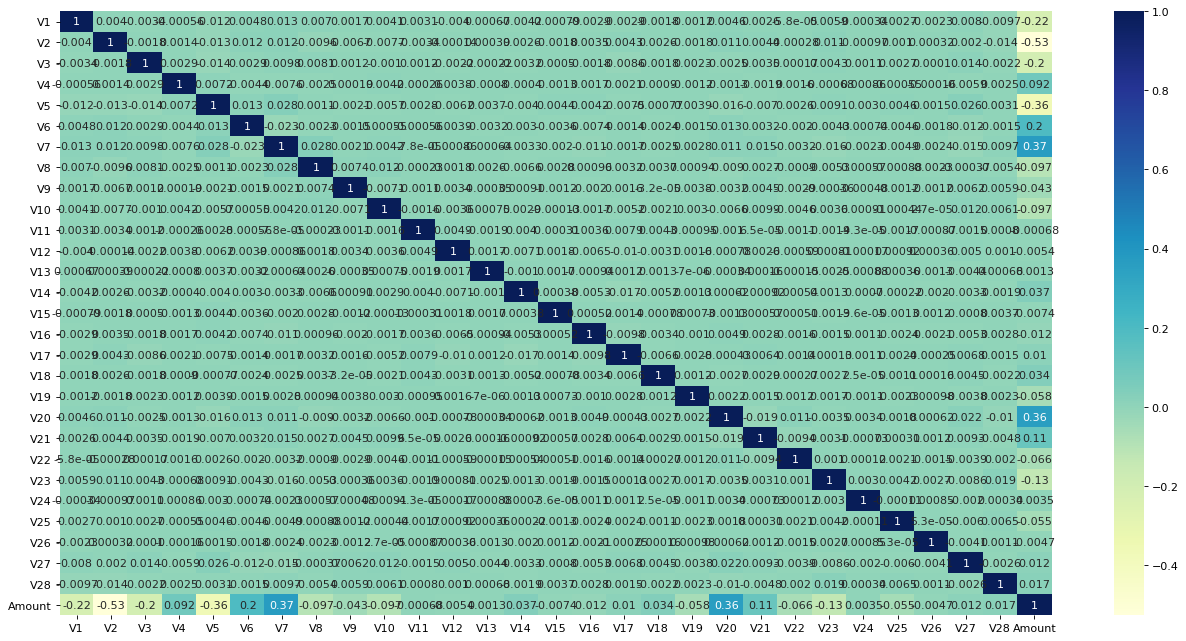

In [27]:
plt.figure(figsize=(20,10), dpi=80, facecolor='w', edgecolor='k', frameon='True')
Xtrain_cor = X_train.corr()
sns.heatmap(Xtrain_cor, cmap="YlGnBu", annot=True)
plt.show()

## Model Building
- Build different models on the imbalanced dataset and see the result

### Logistic Regression


In [28]:
#setting the number of folds
cv_num =StratifiedKFold(n_splits=5, shuffle = True, random_state = 100)   #--> list of values

#### perfom cross validation on the X_train & y_train to create:
- X_train_cv
- X_test_cv 
- y_train_cv
- y_test_cv 

In [28]:
#listing the regularisation parameters
num_C = {'C':[0.001,0.01,0.1,1,10,100], 'penalty':['l1','l2']}  #--> list of values

# Initiating the model
model = LogisticRegression()

In [29]:
#perform hyperparameter tuning
model_cv = GridSearchCV(estimator = model, param_grid = num_C, scoring = 'recall', cv = cv_num,return_train_score = True, verbose = 1, n_jobs = -1)

#print the evaluation result by choosing a evaluation metric
model_cv.fit(X_train_pt_df, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    9.3s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:   15.6s finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=100, shuffle=True),
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'penalty': ['l1', 'l2']},
             return_train_score=True, scoring='recall', verbose=1)

In [30]:
#print the optimum value of hyperparameters
best_score = model_cv.best_score_
best_param = model_cv.best_params_

print('The best recall score is: ',model_cv.best_score_)
print('The best params are: ',model_cv.best_params_)

The best recall score is:  0.6771099744245525
The best params are:  {'C': 1, 'penalty': 'l2'}


### Similarly explore other algorithms by building models like:
- KNN
- SVM
- Decision Tree
- Random Forest
- XGBoost

#### Proceed with the model which shows the best result 
- Apply the best hyperparameter on the model
- Predict on the test dataset

In [31]:
model_log = LogisticRegression(C = 1.0, penalty = 'l2', n_jobs = -1) #initialise the model with optimum hyperparameters
model_log.fit(X_train_pt_df, y_train)

LogisticRegression(n_jobs=-1)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,

                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   
                   multi_class='auto', n_jobs=-1, penalty='l2',
                   
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   
                   warm_start=False)

In [32]:
# Predictions on test data
y_test_pred = model_log.predict(X_test_pt)

# Classification report on test data
print(classification_report(y_test, y_test_pred))#print the evaluation score on the X_test by choosing the best evaluation metric

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.84      0.63      0.72       148

    accuracy                           1.00     85443
   macro avg       0.92      0.81      0.86     85443
weighted avg       1.00      1.00      1.00     85443



### Random Forest

In [38]:
model_forest = RandomForestClassifier()

In [39]:
#with max_depth
# hyperparameter space
num_C = {'max_depth': [12,14,16]}

# creating gridsearch object
forest_cv_1 = RandomizedSearchCV(model_forest, num_C, scoring='recall',
                          cv = cv_num,verbose = 1, n_jobs=-1)

In [40]:
#print the evaluation result by choosing a evaluation metric
forest_cv_1.fit(X_train_pt_df, y_train)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:  8.4min finished


RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=100, shuffle=True),
                   estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'max_depth': [12, 14, 16]},
                   scoring='recall', verbose=1)

In [41]:
#print the optimum value of hyperparameters

print('The best recall score is: ',forest_cv_1.best_score_)
print('The best params are: ',forest_cv_1.best_params_)

The best recall score is:  0.7817561807331629
The best params are:  {'max_depth': 16}


In [42]:
#with min_samples_leaf
# hyperparameter space
num_C = {'min_samples_leaf': range(100, 400, 250)}

# creating gridsearch object
forest_cv_2 = RandomizedSearchCV(model_forest, num_C, scoring='recall',
                          cv = cv_num,verbose = 1, n_jobs=-1)
#print the evaluation result by choosing a evaluation metric
forest_cv_2.fit(X_train_pt_df, y_train)

Fitting 5 folds for each of 2 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:  5.4min finished


RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=100, shuffle=True),
                   estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'min_samples_leaf': range(100, 400, 250)},
                   scoring='recall', verbose=1)

In [43]:
#print the optimum value of hyperparameters

print('The best recall score is: ',forest_cv_2.best_score_)
print('The best params are: ',forest_cv_2.best_params_)

The best recall score is:  0.5697783461210572
The best params are:  {'min_samples_leaf': 100}


In [44]:
#with min_samples_split
# hyperparameter space
num_C = {'min_samples_split': range(200, 350, 250)}

# creating gridsearch object
forest_cv_3 = RandomizedSearchCV(model_forest, num_C, scoring='recall',
                          cv = cv_num,verbose = 1, n_jobs=-1)
#print the evaluation result by choosing a evaluation metric
forest_cv_3.fit(X_train_pt_df, y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  4.3min finished


RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=100, shuffle=True),
                   estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'min_samples_split': range(200, 350, 250)},
                   scoring='recall', verbose=1)

In [45]:
#print the optimum value of hyperparameters

print('The best recall score is: ',forest_cv_3.best_score_)
print('The best params are: ',forest_cv_3.best_params_)

The best recall score is:  0.7294543904518329
The best params are:  {'min_samples_split': 200}


In [52]:
#with min_samples_split
# hyperparameter space
num_C = {'n_estimators': [500,900, 800]}

# creating gridsearch object
forest_cv_4 = RandomizedSearchCV(model_forest, num_C, scoring='recall',
                          cv = cv_num,verbose = 1, n_jobs=-1)
#print the evaluation result by choosing a evaluation metric
forest_cv_4.fit(X_train_pt_df, y_train)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed: 70.8min finished


RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=100, shuffle=True),
                   estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'n_estimators': [500, 900, 800]},
                   scoring='recall', verbose=1)

In [53]:
#print the optimum value of hyperparameters

print('The best recall score is: ',forest_cv_4.best_score_)
print('The best params are: ',forest_cv_4.best_params_)

The best recall score is:  0.7759164535379369
The best params are:  {'n_estimators': 500}


In [54]:
#with min_samples_split
# hyperparameter space
num_C = {'max_features': [5, 10]}

# creating gridsearch object
forest_cv_5 = RandomizedSearchCV(model_forest, num_C, scoring='recall',
                          cv = cv_num,verbose = 1, n_jobs=-1)
#print the evaluation result by choosing a evaluation metric
forest_cv_5.fit(X_train_pt_df, y_train)

Fitting 5 folds for each of 2 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed: 10.8min finished


RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=100, shuffle=True),
                   estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'max_features': [5, 10]},
                   scoring='recall', verbose=1)

In [55]:
#print the optimum value of hyperparameters

print('The best recall score is: ',forest_cv_5.best_score_)
print('The best params are: ',forest_cv_5.best_params_)

The best recall score is:  0.7846121057118498
The best params are:  {'max_features': 10}


In [56]:
# model with the best hyperparameters

rfc = RandomForestClassifier(bootstrap=True,
                             max_depth=16,
                             min_samples_leaf=100, 
                             min_samples_split=200,
                              max_features=10,
                             n_estimators=500)
# fit
rfc.fit(X_train_pt_df,y_train)

RandomForestClassifier(max_depth=16, max_features=10, min_samples_leaf=100,
                       min_samples_split=200, n_estimators=500)

In [57]:
# predict
y_test_pred = rfc.predict(X_test_pt)
# Classification report on test data
print(classification_report(y_test, y_test_pred))#print the evaluation score on the X_test by choosing the best evaluation metric

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.81      0.61      0.70       148

    accuracy                           1.00     85443
   macro avg       0.90      0.81      0.85     85443
weighted avg       1.00      1.00      1.00     85443



### XGBoost

In [58]:

# fit model on training data with default hyperparameters
xgb_model = XGBClassifier()

In [59]:
# Create the parameter grid based on the results of random search 
num_C = {
     'n_estimators': range(100,1000,300)
}
# Instantiate the grid search model
xgb_cv_1 = RandomizedSearchCV(xgb_model, num_C, scoring='recall',
                          cv = cv_num,verbose = 1, n_jobs=-1)

# fit the model on train data 
xgb_cv_1.fit(X_train_pt_df, y_train)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed: 17.4min finished


RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=100, shuffle=True),
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100, n_jobs=None,
                                           num_parallel_tree=None,
                                           ran

In [60]:
#print the optimum value of hyperparameters
print('The best recall score is: ',xgb_cv_1.best_score_)
print('The best params are: ',xgb_cv_1.best_params_)

The best recall score is:  0.7991901108269395
The best params are:  {'n_estimators': 700}


In [61]:

# Create the parameter grid based on the results of random search 
num_C = {
     'learning_rate': [0.01,0.1,1]
}
# Instantiate the grid search model
xgb_cv_2 = RandomizedSearchCV(xgb_model, num_C, scoring='recall',
                          cv = cv_num,verbose = 1, n_jobs=-1)

# fit the model on train data 
xgb_cv_2.fit(X_train_pt_df, y_train)    

Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:  6.5min finished


RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=100, shuffle=True),
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100, n_jobs=None,
                                           num_parallel_tree=None,
                                           ran

In [62]:
#print the optimum value of hyperparameters
print('The best recall score is: ',xgb_cv_2.best_score_)
print('The best params are: ',xgb_cv_2.best_params_)

The best recall score is:  0.7963341858482524
The best params are:  {'learning_rate': 0.1}


In [63]:

# Create the parameter grid based on the results of random search 
num_C = {
     'max_depth': range(10,30,5)
}
# Instantiate the grid search model
xgb_cv_3 = RandomizedSearchCV(xgb_model, num_C, scoring='recall',
                          cv = cv_num,verbose = 1, n_jobs=-1)

# fit the model on train data 
xgb_cv_3.fit(X_train_pt_df, y_train)    

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:  9.4min finished


RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=100, shuffle=True),
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100, n_jobs=None,
                                           num_parallel_tree=None,
                                           ran

In [64]:
#print the optimum value of hyperparameters
print('The best recall score is: ',xgb_cv_3.best_score_)
print('The best params are: ',xgb_cv_3.best_params_)

The best recall score is:  0.7904944586530264
The best params are:  {'max_depth': 10}


In [65]:
# Create the parameter grid based on the results of random search 

# Fitting with tuned hyperparameters
xgb_final =XGBClassifier(learning_rate = 0.1,
                         n_estimators = 400, max_depth = 10,random_state = 100)

xgb_final.fit(X_train_pt_df, y_train)


XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.1, max_delta_step=0, max_depth=10,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=400, n_jobs=0, num_parallel_tree=1, random_state=100,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method=None, validate_parameters=False, verbosity=None)

In [66]:
# Making predictions
# Predictions on test set
y_test_pred = xgb_final.predict(X_test_pt_df)

# Classification report on test set
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.93      0.80      0.86       148

    accuracy                           1.00     85443
   macro avg       0.96      0.90      0.93     85443
weighted avg       1.00      1.00      1.00     85443



In [67]:
Prediction_Recall={
    'Logistic Regression': 0.6653781512605043,
    'Random Forest forest_cv_1': 0.7875532821824381,
    'Random Forest forest_cv_2': 0.5522591645353794,
    'Random Forest forest_cv_3': 0.7294543904518329,
    'Random Forest forest_cv_4': 0.7788576300085251,
    'Random Forest forest_cv_5': 0.7904518329070759,
    'Random Forest final': 0.59,
    'XGBoost xgb_cv_1': 0.8111251837107989,
    'XGBoost xgb_cv_2': 0.7907075702780878,
    'XGBoost xgb_cv_3': 0.8082266184471736,
    'XGBoost final model': 0.80
   # 'Logistic Regression Adasyn Hyperparameter Tuning': lr_recall_adasyn_HP
}

Text(0.5, 0, 'Recall Score')

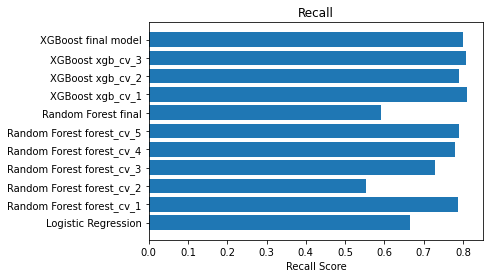

In [68]:
plt.title('Recall')
plt.barh(range(len(Prediction_Recall)), list(Prediction_Recall.values()), align='center')
plt.yticks(range(len(Prediction_Recall)), list(Prediction_Recall.keys()))
plt.xlabel('Recall Score')

We can see that XGBoost xgb_cv_1 has the highest recall of 0.81 with 'n_estimators': 400

### Print the important features of the best model to understand the dataset
- This will not give much explanation on the already transformed dataset
- But it will help us in understanding if the dataset is not PCA transformed

In [69]:
#since the best model is that of XGBoost
clf=xgb_cv_1

Top var = 17
2nd Top var = 14
3rd Top var = 10


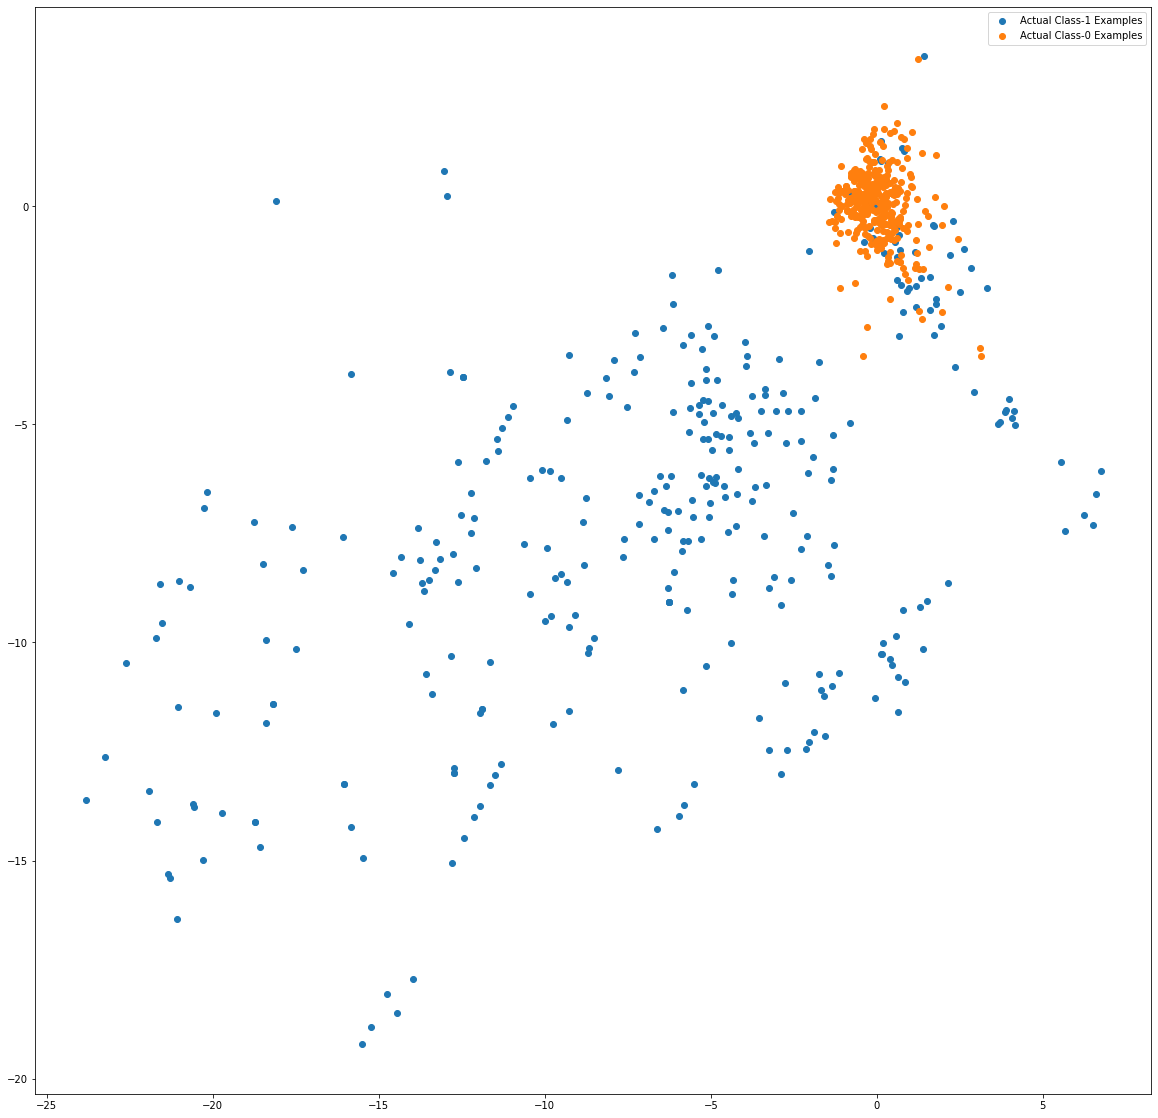

In [70]:
var_imp = []
for i in clf.best_estimator_.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(clf.best_estimator_.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(clf.best_estimator_.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(clf.best_estimator_.feature_importances_)[-3])+1)

# Variable on Index-16 and Index-13 seems to be the top 2 variables
top_var_index = var_imp.index(np.sort(clf.best_estimator_.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(clf.best_estimator_.feature_importances_)[-2])

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

np.random.shuffle(X_train_0)


%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()

## Model building with balancing Classes

##### Perform class balancing with :
- SMOTE
- ADASYN

## Model Building
- Build different models on the balanced dataset and see the result

### Print the class distribution after applying SMOTE 

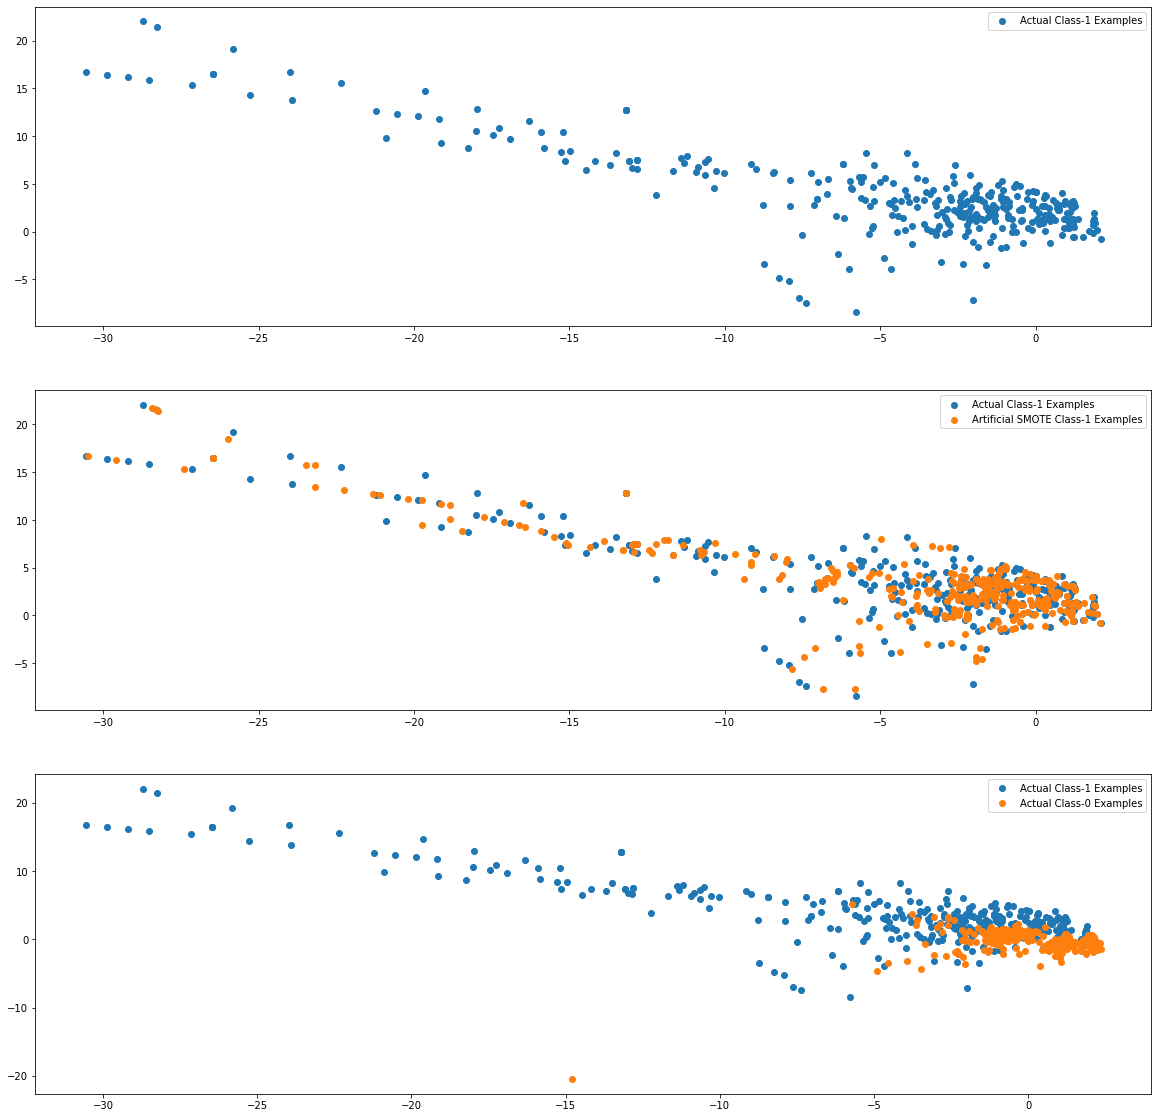

In [73]:
sm = over_sampling.SMOTE(random_state=0)
X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)
# Artificial minority samples and corresponding minority labels from SMOTE are appended
# below X_train and y_train respectively
# So to exclusively get the artificial minority samples from SMOTE, we do
X_train_smote_1 = X_train_smote[X_train.shape[0]:]

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]


plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()

plt.subplot(3, 1, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_smote_1[:X_train_1.shape[0], 0], X_train_smote_1[:X_train_1.shape[0], 1],
            label='Artificial SMOTE Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 3)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()

In [74]:
y_train_smote

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

Percentage of normal transactions:  0.5
Percentage of fraud transactions:  0.5
Total number of transactions in balanced data:  398040


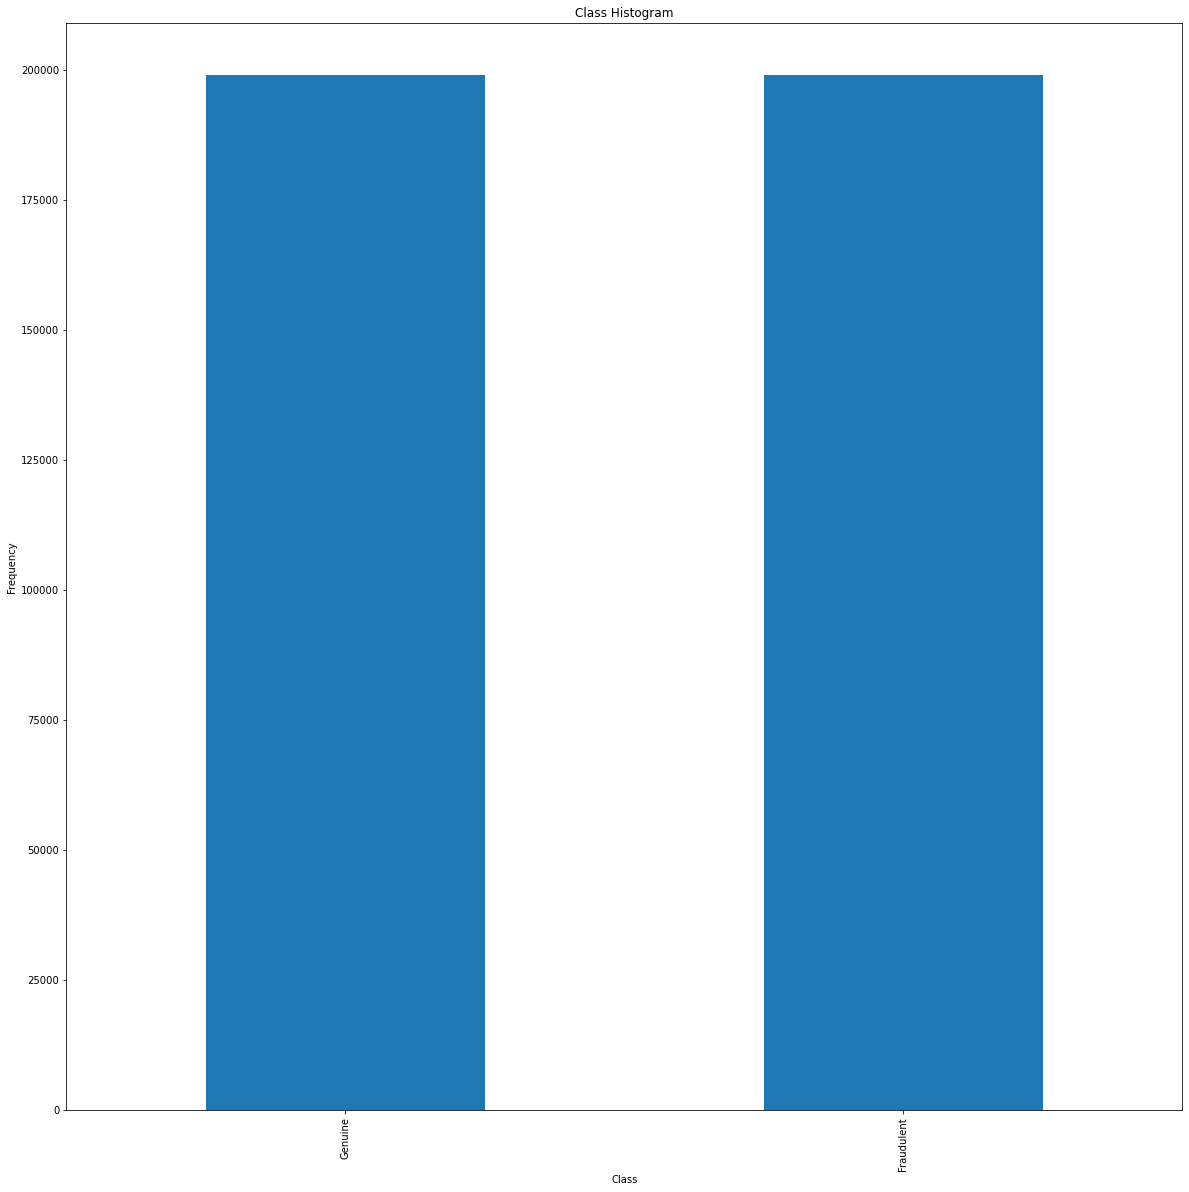

In [75]:

count_of_classes = pd.value_counts(y_train_smote, sort = True).sort_index()
count_of_classes.plot(kind = 'bar')
plt.title("Class Histogram")
plt.xlabel("Class")
plt.ylabel("Frequency")
plt.xticks([0,1],["Genuine","Fraudulent"])

# Showing ratio
print("Percentage of normal transactions: ", len(y_train_smote[y_train_smote == 0])/len(y_train_smote))
print("Percentage of fraud transactions: ", len(y_train_smote[y_train_smote == 1])/len(y_train_smote))
print("Total number of transactions in balanced data: ", len(y_train_smote))

##### Logistic

In [76]:
lr_smote = LogisticRegression(max_iter=200, random_state=0, n_jobs = -1)
lr_smote.fit(X_train_smote, y_train_smote)

LogisticRegression(max_iter=200, n_jobs=-1, random_state=0)

In [77]:
lr_predict_smote = lr_smote.predict(X_test)

Accuracy: 97.6136%
Recall: 88.5135%
ROC AUC: 93.0715%


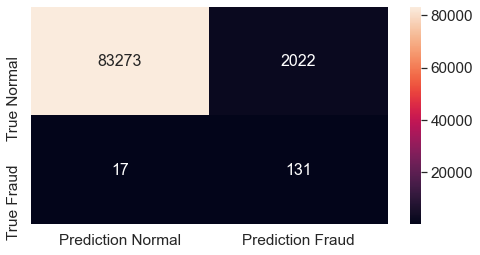

In [78]:
lr_accuracy_smote = accuracy_score(y_test, lr_predict_smote)
lr_recall_smote = recall_score(y_test, lr_predict_smote)
lr_cm_smote = confusion_matrix(y_test, lr_predict_smote)
lr_auc_smote = roc_auc_score(y_test, lr_predict_smote)

print("Accuracy: {:.4%}".format(lr_accuracy_smote))
print("Recall: {:.4%}".format(lr_recall_smote))
print("ROC AUC: {:.4%}".format(lr_auc_smote))

lr_cm_smote = pd.DataFrame(lr_cm_smote, ['True Normal','True Fraud'],['Prediction Normal','Prediction Fraud'])
pyplot.figure(figsize = (8,4))
sns.set(font_scale=1.4)
sns.heatmap(lr_cm_smote, annot=True,annot_kws={"size": 16},fmt='g')

##### Random XClassifier

In [79]:
rf_smote = RandomForestClassifier(n_estimators= 200, criterion = 'entropy', random_state = 0, n_jobs = -1)
rf_smote.fit(X_train_smote, y_train_smote)

RandomForestClassifier(criterion='entropy', n_estimators=200, n_jobs=-1,
                       random_state=0)

In [80]:
rf_predict_smote = rf_smote.predict(X_test)

Accuracy: 99.9485%
Recall: 82.4324%
ROC AUC: 91.2057%


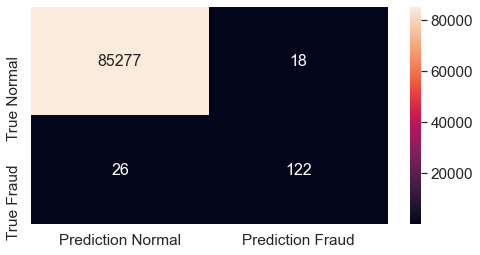

In [81]:
rf_accuracy_smote = accuracy_score(y_test, rf_predict_smote)
rf_recall_smote = recall_score(y_test, rf_predict_smote)
rf_cm_smote = confusion_matrix(y_test, rf_predict_smote)
rf_auc_smote = roc_auc_score(y_test, rf_predict_smote)

print("Accuracy: {:.4%}".format(rf_accuracy_smote))
print("Recall: {:.4%}".format(rf_recall_smote))
print("ROC AUC: {:.4%}".format(rf_auc_smote))

rf_cm_smote = pd.DataFrame(rf_cm_smote, ['True Normal','True Fraud'],['Prediction Normal','Prediction Fraud'])
pyplot.figure(figsize = (8,4))
sns.set(font_scale=1.4)
sns.heatmap(rf_cm_smote, annot=True,annot_kws={"size": 16},fmt='g')

#### Lets do hyperparameter tuning 

In [135]:
#Logistic Regression :


LogReg = LogisticRegression()
parameters = {'C': [0.01, 0.1, 1]}
auprc_scorer = make_scorer(average_precision_score)
# Perform grid search on the classifier using 'scorer' as the scoring method using GridSearchCV()
grid_obj = GridSearchCV(estimator=LogReg,param_grid=parameters,scoring=auprc_scorer)

# Reshape the labels due to an indexing glitch
# a,b = smote_y_train.shape
# smote_y_train = smote_y_train.iloc[0:,0].values.reshape(a,)

# Fit the grid search object to the training data and find the optimal parameters using fit()
grid_fit = grid_obj.fit(X_train_smote,y_train_smote)

# Get the estimator
best_clf = grid_fit.best_estimator_

# get cv scores using the unoptimized and optimized model
predictions_cv = cross_val_score(LogReg, X_train_smote, y_train_smote,cv=3, scoring = auprc_scorer).mean()
best_predictions_cv = cross_val_score(best_clf, X_train_smote, y_train_smote,cv=3, scoring = auprc_scorer).mean()

In [136]:
print ("Final Cross Validation Score on training data (AUPRC): {:.4f}".format(best_predictions_cv))

Final Cross Validation Score on training data (AUPRC): 0.9403


In [138]:
lr_predict_smote_HP =  best_clf.predict((X_test))

Accuracy: 97.6136%
Recall: 88.5135%
ROC AUC: 93.0715%


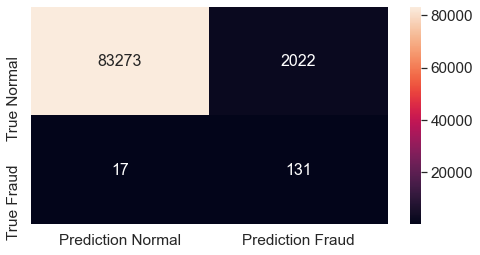

In [139]:
lr_accuracy_smote_HP = accuracy_score(y_test, lr_predict_smote_HP)
lr_recall_smote_HP = recall_score(y_test, lr_predict_smote_HP)
lr_cm_smote_HP = confusion_matrix(y_test, lr_predict_smote_HP)
lr_auc_smote_HP = roc_auc_score(y_test, lr_predict_smote_HP)

print("Accuracy: {:.4%}".format(lr_accuracy_smote_HP))
print("Recall: {:.4%}".format(lr_recall_smote_HP))
print("ROC AUC: {:.4%}".format(lr_auc_smote_HP))

lr_cm_smote_HP = pd.DataFrame(lr_cm_smote_HP, ['True Normal','True Fraud'],['Prediction Normal','Prediction Fraud'])
pyplot.figure(figsize = (8,4))
sns.set(font_scale=1.4)
sns.heatmap(lr_cm_smote_HP, annot=True,annot_kws={"size": 16},fmt='g')

#### XGBoost

In [128]:
# Create the parameter grid based on the results of random search 
num_C = {
     'n_estimators': range(100,1000,300)
}
cv_num =StratifiedKFold(n_splits=5, shuffle = True, random_state = 100)   #--> list of values
# Instantiate the grid search model
xgb_smote_1 = RandomizedSearchCV(xgb_model, num_C, scoring='recall',
                          cv = cv_num,verbose = 1, n_jobs=-1)

# fit the model on train data 
xgb_smote_1.fit(X_train_smote, y_train_smote)


Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed: 58.7min finished


RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=100, shuffle=True),
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100, n_jobs=None,
                                           num_parallel_tree=None,
                                           ran

In [129]:
# Making predictions
# Predictions on test set
y_test_pred = xgb_smote_1.predict(X_test_pt)

# Classification report on test set
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.87      0.72      0.79       148

    accuracy                           1.00     85443
   macro avg       0.93      0.86      0.89     85443
weighted avg       1.00      1.00      1.00     85443



In [130]:
#print the optimum value of hyperparameters
print('The best recall score is: ',xgb_smote_1.best_score_)
print('The best params are: ',xgb_smote_1.best_params_)

The best recall score is:  1.0
The best params are:  {'n_estimators': 400}


In [132]:
# Create the parameter grid based on the results of random search 
num_C = {
     'learning_rate': [0.01,0.1,1]
}
# Instantiate the grid search model
xgb_smote_2 = RandomizedSearchCV(xgb_model, num_C, scoring='recall',
                          cv = cv_num,verbose = 1, n_jobs=-1)

# fit the model on train data 
xgb_smote_2.fit(X_train_smote, y_train_smote)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed: 18.7min finished


RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=100, shuffle=True),
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100, n_jobs=None,
                                           num_parallel_tree=None,
                                           ran

In [133]:
# Making predictions
# Predictions on test set
y_test_pred = xgb_smote_2.predict(X_test_pt)

# Classification report on test set
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.79      0.68      0.73       148

    accuracy                           1.00     85443
   macro avg       0.89      0.84      0.87     85443
weighted avg       1.00      1.00      1.00     85443



In [134]:
#print the optimum value of hyperparameters
print('The best recall score is: ',xgb_smote_2.best_score_)
print('The best params are: ',xgb_smote_2.best_params_)

The best recall score is:  1.0
The best params are:  {'learning_rate': 1}


In [83]:

# Create the parameter grid based on the results of random search 
num_C = {
     'max_depth': range(10,30,5)
}
# Instantiate the grid search model
xgb_smote_3 = RandomizedSearchCV(xgb_model, num_C, scoring='recall',
                          cv = cv_num,verbose = 1, n_jobs=-1)

# fit the model on train data 
xgb_smote_3.fit(X_train_smote, y_train_smote)   

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed: 36.6min finished


RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=100, shuffle=True),
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100, n_jobs=None,
                                           num_parallel_tree=None,
                                           ran

In [84]:
# Making predictions
# Predictions on test set
y_test_pred = xgb_smote_3.predict(X_test_pt)

# Classification report on test set
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.79      0.72      0.75       148

    accuracy                           1.00     85443
   macro avg       0.89      0.86      0.88     85443
weighted avg       1.00      1.00      1.00     85443



In [85]:
#print the optimum value of hyperparameters
print('The best recall score is: ',xgb_smote_3.best_score_)
print('The best params are: ',xgb_smote_3.best_params_)

The best recall score is:  1.0
The best params are:  {'max_depth': 10}


In [86]:
# Fitting with tuned hyperparameters
xgb_smote_final =XGBClassifier(learning_rate = 1.0,
                         n_estimators = 700, max_depth = 15,random_state = 100)

xgb_smote_final.fit(X_train_smote, y_train_smote)


XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=1.0, max_delta_step=0, max_depth=15,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=700, n_jobs=0, num_parallel_tree=1, random_state=100,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method=None, validate_parameters=False, verbosity=None)

In [114]:
# Making predictions

# Predictions on test set
y_test_xgb_smote_pred = xgb_smote_final.predict(X_test_pt)

# Classification report on test set
print(classification_report(y_test, y_test_xgb_smote_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.76      0.67      0.71       148

    accuracy                           1.00     85443
   macro avg       0.88      0.83      0.85     85443
weighted avg       1.00      1.00      1.00     85443



Accuracy: 99.9052%
Recall: 66.8919%
ROC AUC: 83.4272%


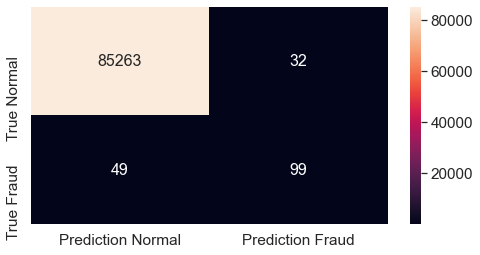

In [115]:
xgb_smote_final_accuracy = accuracy_score(y_test, y_test_xgb_smote_pred)
xgb_smote_final_recall = recall_score(y_test, y_test_xgb_smote_pred)
xgb_smote_final_cm = confusion_matrix(y_test, y_test_xgb_smote_pred)
xgb_smote_final_auc = roc_auc_score(y_test, y_test_xgb_smote_pred)

print("Accuracy: {:.4%}".format(xgb_smote_final_accuracy))
print("Recall: {:.4%}".format(xgb_smote_final_recall))
print("ROC AUC: {:.4%}".format(xgb_smote_final_auc))

xgb_smote_final_cm = pd.DataFrame(xgb_smote_final_cm, ['True Normal','True Fraud'],['Prediction Normal','Prediction Fraud'])
pyplot.figure(figsize = (8,4))
sns.set(font_scale=1.4)
sns.heatmap(xgb_smote_final_cm, annot=True,annot_kws={"size": 16},fmt='g')

### Print the class distribution after applying ADASYN

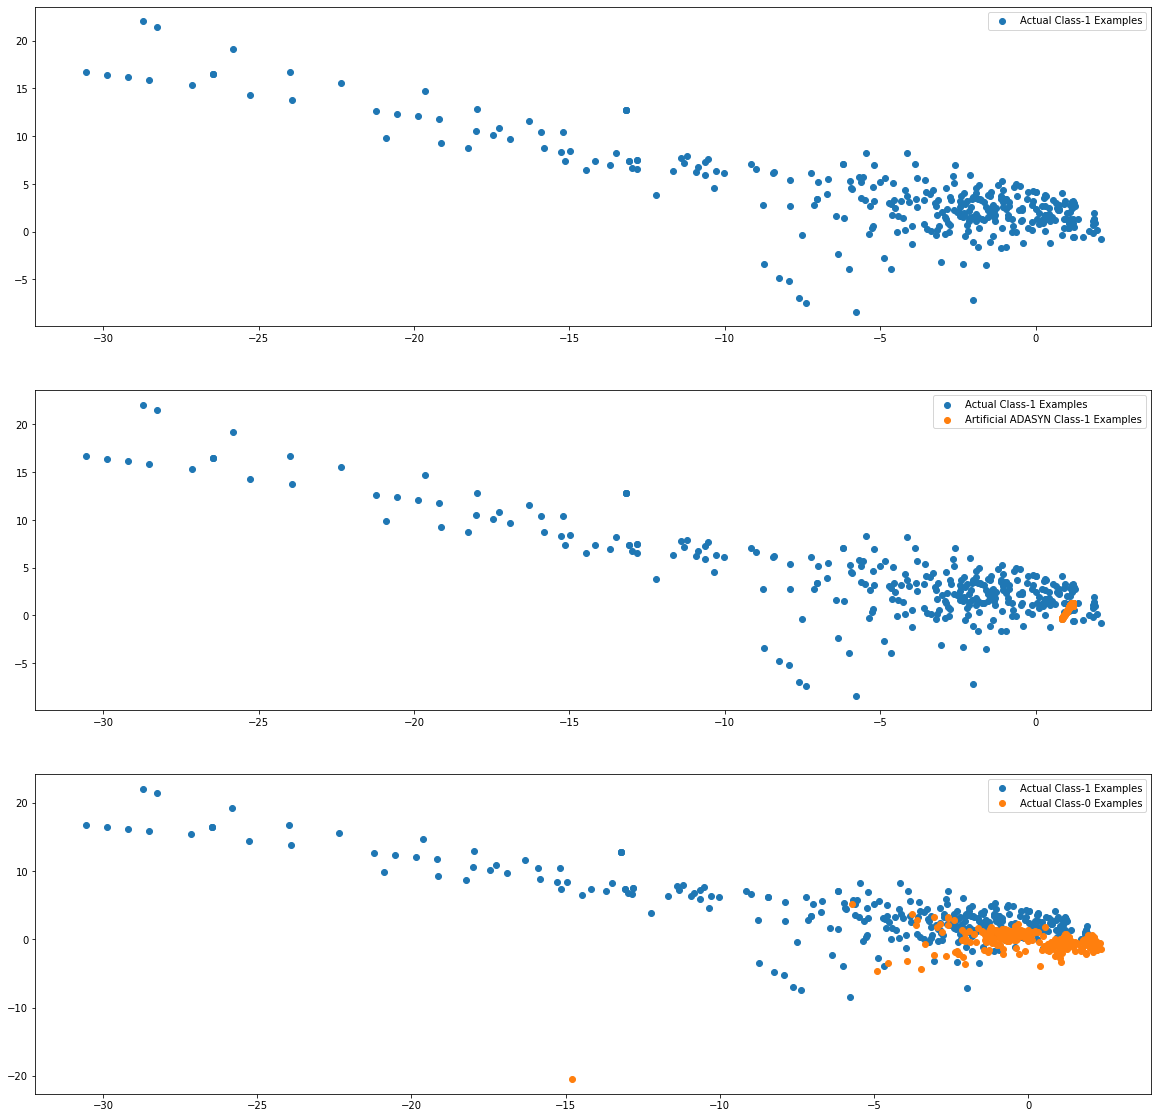

In [29]:
ada = over_sampling.ADASYN(random_state=0)
X_train_adasyn, y_train_adasyn = ada.fit_resample(X_train, y_train)
# Artificial minority samples and corresponding minority labels from ADASYN are appended
# below X_train and y_train respectively
# So to exclusively get the artificial minority samples from ADASYN, we do
X_train_adasyn_1 = X_train_adasyn[X_train.shape[0]:]

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()

plt.subplot(3, 1, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_adasyn_1[:X_train_1.shape[0], 0], X_train_adasyn_1[:X_train_1.shape[0], 1],
            label='Artificial ADASYN Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 3)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()

#### Logistic Regression

Accuracy: 91.7325%
Recall: 93.2432%
ROC AUC: 92.4866%


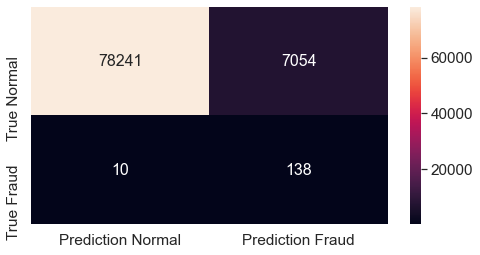

In [30]:
lr_adasyn = LogisticRegression(max_iter=200, random_state=0, n_jobs = -1)
lr_adasyn.fit(X_train_adasyn, y_train_adasyn)
lr_predict_adasyn = lr_adasyn.predict(X_test)


lr_accuracy_adasyn = accuracy_score(y_test, lr_predict_adasyn)
lr_recall_adasyn = recall_score(y_test, lr_predict_adasyn)
lr_cm_adasyn = confusion_matrix(y_test, lr_predict_adasyn)
lr_auc_adasyn = roc_auc_score(y_test, lr_predict_adasyn)

print("Accuracy: {:.4%}".format(lr_accuracy_adasyn))
print("Recall: {:.4%}".format(lr_recall_adasyn))
print("ROC AUC: {:.4%}".format(lr_auc_adasyn))

lr_cm_adasyn = pd.DataFrame(lr_cm_adasyn, ['True Normal','True Fraud'],['Prediction Normal','Prediction Fraud'])
pyplot.figure(figsize = (8,4))
sns.set(font_scale=1.4)
sns.heatmap(lr_cm_adasyn, annot=True,annot_kws={"size": 16},fmt='g')

###### Logistic Regression with hyperparameter tuning

In [ ]:
LogRegAdasyn = LogisticRegression()
parameters = {'C': [0.01, 0.1, 1]}
auprc_scorer = make_scorer(average_precision_score)
# Perform grid search on the classifier using 'scorer' as the scoring method using GridSearchCV()
grid_obj = GridSearchCV(estimator=LogRegAdasyn,param_grid=parameters,scoring=auprc_scorer)

# Reshape the labels due to an indexing glitch
# a,b = smote_y_train.shape
# smote_y_train = smote_y_train.iloc[0:,0].values.reshape(a,)

# Fit the grid search object to the training data and find the optimal parameters using fit()
grid_fit = grid_obj.fit(X_train_adasyn, y_train_adasyn)

# Get the estimator
best_clf_adasyn = grid_fit.best_estimator_

# get cv scores using the unoptimized and optimized model
predictions_cv_adasyn = cross_val_score(LogRegAdasyn, X_train_adasyn, y_train_adasyn,cv=3, scoring = auprc_scorer).mean()
best_predictions_cv_adasyn = cross_val_score(best_clf_adasyn, X_train_adasyn, y_train_adasyn,cv=3, scoring = auprc_scorer).mean()

In [ ]:
print ("Final Cross Validation Score on training data (AUPRC): {:.4f}".format(best_predictions_cv_adasyn))

Final Cross Validation Score on training data (AUPRC): 0.8292

In [ ]:
lr_predict_adasyn_HP =  best_clf_adasyn.predict((X_test))

In [ ]:
lr_accuracy_adasyn_HP = accuracy_score(y_test, lr_predict_adasyn_HP)
lr_recall_adasyn_HP = recall_score(y_test, lr_predict_adasyn_HP)
lr_cm_adasyn_HP = confusion_matrix(y_test, lr_predict_adasyn_HP)
lr_auc_adasyn_HP = roc_auc_score(y_test, lr_predict_adasyn_HP)

print("Accuracy: {:.4%}".format(lr_accuracy_adasyn_HP))
print("Recall: {:.4%}".format(lr_recall_adasyn_HP))
print("ROC AUC: {:.4%}".format(lr_auc_adasyn_HP))

lr_cm_smote_HP = pd.DataFrame(lr_cm_adasyn_HP, ['True Normal','True Fraud'],['Prediction Normal','Prediction Fraud'])
pyplot.figure(figsize = (8,4))
sns.set(font_scale=1.4)
sns.heatmap(lr_cm_adasyn_HP, annot=True,annot_kws={"size": 16},fmt='g')

Accuracy: 91.7302%

Recall: 93.2432%

ROC AUC: 92.4854%


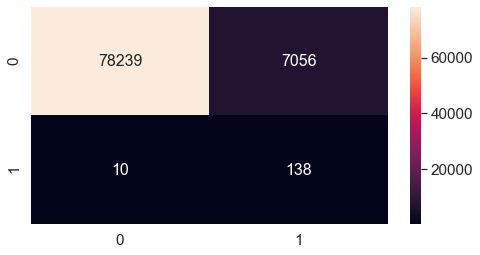

We see that there is not much difference amongst the 2 logistic regression models.

###### Random Forest

In [90]:
rf_adasyn = RandomForestClassifier(n_estimators= 200, criterion = 'entropy', random_state = 0, n_jobs = -1)
rf_adasyn.fit(X_train_adasyn, y_train_adasyn)

RandomForestClassifier(criterion='entropy', n_estimators=200, n_jobs=-1,
                       random_state=0)

Accuracy: 99.9450%
Recall: 81.0811%
ROC AUC: 90.5294%


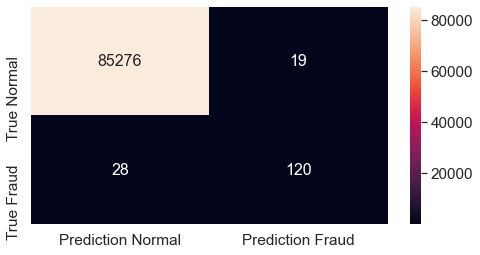

In [92]:
rf_predict_adasyn = rf_adasyn.predict(X_test)
rf_accuracy_adasyn = accuracy_score(y_test, rf_predict_adasyn)
rf_recall_adasyn = recall_score(y_test, rf_predict_adasyn)
rf_cm_adasyn = confusion_matrix(y_test, rf_predict_adasyn)
rf_auc_adasyn = roc_auc_score(y_test, rf_predict_adasyn)

print("Accuracy: {:.4%}".format(rf_accuracy_adasyn))
print("Recall: {:.4%}".format(rf_recall_adasyn))
print("ROC AUC: {:.4%}".format(rf_auc_adasyn))

rf_cm_adasyn = pd.DataFrame(rf_cm_adasyn, ['True Normal','True Fraud'],['Prediction Normal','Prediction Fraud'])
pyplot.figure(figsize = (8,4))
sns.set(font_scale=1.4)
sns.heatmap(rf_cm_adasyn, annot=True,annot_kws={"size": 16},fmt='g')

#### XGBoost

In [93]:
# Create the parameter grid based on the results of random search 
num_C = {
     'n_estimators': range(100,1000,300)
}
cv_num =StratifiedKFold(n_splits=5, shuffle = True, random_state = 100)   #--> list of values
# Instantiate the grid search model
xgb_adasyn_1 = RandomizedSearchCV(xgb_model, num_C, scoring='recall',
                          cv = cv_num,verbose = 1, n_jobs=-1)

# fit the model on train data 
xgb_adasyn_1.fit(X_train_adasyn, y_train_adasyn)


Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed: 59.0min finished


RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=100, shuffle=True),
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100, n_jobs=None,
                                           num_parallel_tree=None,
                                           ran

In [94]:
# Predictions on test set
y_test_pred = xgb_adasyn_1.predict(X_test_pt)

# Classification report on test set
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.85      0.70      0.77       148

    accuracy                           1.00     85443
   macro avg       0.93      0.85      0.89     85443
weighted avg       1.00      1.00      1.00     85443



In [95]:
#print the optimum value of hyperparameters
print('The best recall score is: ',xgb_adasyn_1.best_score_)
print('The best params are: ',xgb_adasyn_1.best_params_)

The best recall score is:  0.9999949748743718
The best params are:  {'n_estimators': 100}


In [97]:
# Create the parameter grid based on the results of random search 
num_C = {
     'learning_rate': [0.01,0.1,1]
}
# Instantiate the grid search model
xgb_adasyn_2 = RandomizedSearchCV(xgb_model, num_C, scoring='recall',
                          cv = cv_num,verbose = 1, n_jobs=-1)

# fit the model on train data 
xgb_adasyn_2.fit(X_train_adasyn, y_train_adasyn)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed: 17.6min finished


RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=100, shuffle=True),
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100, n_jobs=None,
                                           num_parallel_tree=None,
                                           ran

In [98]:
# Predictions on test set
y_test_pred = xgb_adasyn_2.predict(X_test_pt)

# Classification report on test set
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.30      0.79      0.44       148

    accuracy                           1.00     85443
   macro avg       0.65      0.89      0.72     85443
weighted avg       1.00      1.00      1.00     85443



In [99]:
#print the optimum value of hyperparameters
print('The best recall score is: ',xgb_adasyn_2.best_score_)
print('The best params are: ',xgb_adasyn_2.best_params_)

The best recall score is:  0.9999899497487437
The best params are:  {'learning_rate': 0.1}


In [100]:

# Create the parameter grid based on the results of random search 
num_C = {
     'max_depth': range(10,30,5)
}
# Instantiate the grid search model
xgb_adasyn_3 = RandomizedSearchCV(xgb_model, num_C, scoring='recall',
                          cv = cv_num,verbose = 1, n_jobs=-1)

# fit the model on train data 
xgb_adasyn_3.fit(X_train_adasyn, y_train_adasyn)   

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed: 36.6min finished


RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=100, shuffle=True),
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100, n_jobs=None,
                                           num_parallel_tree=None,
                                           ran

In [101]:
# Predictions on test set
y_test_pred = xgb_adasyn_3.predict(X_test_pt)

# Classification report on test set
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.82      0.64      0.72       148

    accuracy                           1.00     85443
   macro avg       0.91      0.82      0.86     85443
weighted avg       1.00      1.00      1.00     85443



In [102]:
#print the optimum value of hyperparameters
print('The best recall score is: ',xgb_adasyn_3.best_score_)
print('The best params are: ',xgb_adasyn_3.best_params_)

The best recall score is:  0.9999949748743718
The best params are:  {'max_depth': 10}


In [103]:

# Fitting with tuned hyperparameters
xgb_adasyn_final =XGBClassifier(learning_rate = 1.0,
                         n_estimators = 400, max_depth = 25,random_state = 100)

xgb_adasyn_final.fit(X_train_adasyn, y_train_adasyn)   


XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=1.0, max_delta_step=0, max_depth=25,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=400, n_jobs=0, num_parallel_tree=1, random_state=100,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method=None, validate_parameters=False, verbosity=None)

In [123]:
# Making predictions

# Predictions on test set
y_test_xgb_adasyn_final_pred = xgb_adasyn_final.predict(X_test_pt)

# Classification report on test set
print(classification_report(y_test, y_test_xgb_adasyn_final_pred))



              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.83      0.57      0.67       148

    accuracy                           1.00     85443
   macro avg       0.92      0.78      0.84     85443
weighted avg       1.00      1.00      1.00     85443



Accuracy: 99.9052%
Recall: 56.7568%
ROC AUC: 78.3684%


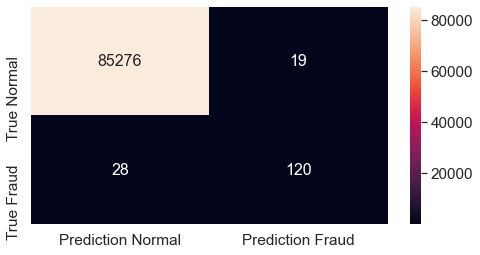

In [124]:

gb_adasyn_final_accuracy = accuracy_score(y_test, y_test_xgb_adasyn_final_pred)
gb_adasyn_final_recall = recall_score(y_test, y_test_xgb_adasyn_final_pred)
gb_adasyn_final_cm = confusion_matrix(y_test, y_test_xgb_adasyn_final_pred)
gb_adasyn_final_auca = roc_auc_score(y_test, y_test_xgb_adasyn_final_pred)

print("Accuracy: {:.4%}".format(gb_adasyn_final_accuracy))
print("Recall: {:.4%}".format(gb_adasyn_final_recall))
print("ROC AUC: {:.4%}".format(gb_adasyn_final_auca))

gb_adasyn_final_cm = pd.DataFrame(gb_adasyn_final_cm, ['True Normal','True Fraud'],['Prediction Normal','Prediction Fraud'])
pyplot.figure(figsize = (8,4))
sns.set(font_scale=1.4)
sns.heatmap(rf_cm_adasyn, annot=True,annot_kws={"size": 16},fmt='g')

### Comparision of models

In [145]:
Prediction_Recall={
    'Logistic Regression SMOTE': 88.5135,
    'Random Forest SMOTE': 82.43,
    'xgb_final smote': 66,
    'xgb_smote_3': 75,
    'xgb_smote_2': 62,
    'xgb_smote_1': 78,
    'Logistic Regression Adasyn': 93.2432,
    'Random Forest Adasyn': 81.0811,
    'xgb_adasyn_1 ':72,
    'xgb_adasyn_2 ':59,
    'xgb_adasyn_3':66,
    'xgb_adasyn_final ':59,
    'Logistic Regression SMOTE Hyperparameter Tuning': 88.5135
   # 'Logistic Regression Adasyn Hyperparameter Tuning': lr_recall_adasyn_HP
}

Prediction_Accuracy={
    
    'Logistic Regression SMOTE': lr_accuracy_smote,
    'Random Forest SMOTE': rf_accuracy_smote,
    'xgb_final smote': xgb_smote_final_accuracy,
    'Logistic Regression Adasyn': lr_accuracy_adasyn,
    'Random Forest Adasyn': rf_accuracy_adasyn,
    'xgb_adasyn_final ':gb_adasyn_final_accuracy,
    'Logistic Regression SMOTE Hyperparameter Tuning': lr_accuracy_smote_HP
   # 'Logistic Regression Adasyn Hyperparameter Tuning': lr_accuracy_adasyn_HP
}


In [148]:
Prediction_Recall={
   'Logistic Regression SMOTE': lr_recall_smote,
    'Random Forest SMOTE': rf_recall_smote,
    'xgb_final smote': xgb_smote_final_recall,
    'Logistic Regression Adasyn': lr_recall_adasyn,
    'Random Forest Adasyn': rf_recall_adasyn,
    'xgb_adasyn_final ':gb_adasyn_final_recall,
    'Logistic Regression SMOTE Hyperparameter Tuning': lr_recall_smote_HP
   # 'Logistic Regression Adasyn Hyperparameter Tuning': lr_recall_adasyn_HP
}

Prediction_Accuracy={
    
    'Logistic Regression SMOTE': lr_accuracy_smote,
    'Random Forest SMOTE': rf_accuracy_smote,
    'xgb_final smote': xgb_smote_final_accuracy,
    'Logistic Regression Adasyn': lr_accuracy_adasyn,
    'Random Forest Adasyn': rf_accuracy_adasyn,
    'xgb_adasyn_final ':gb_adasyn_final_accuracy,
    'Logistic Regression SMOTE Hyperparameter Tuning': lr_accuracy_smote_HP
   # 'Logistic Regression Adasyn Hyperparameter Tuning': lr_accuracy_adasyn_HP
}

Text(0.5, 0, 'Accuracy Score')

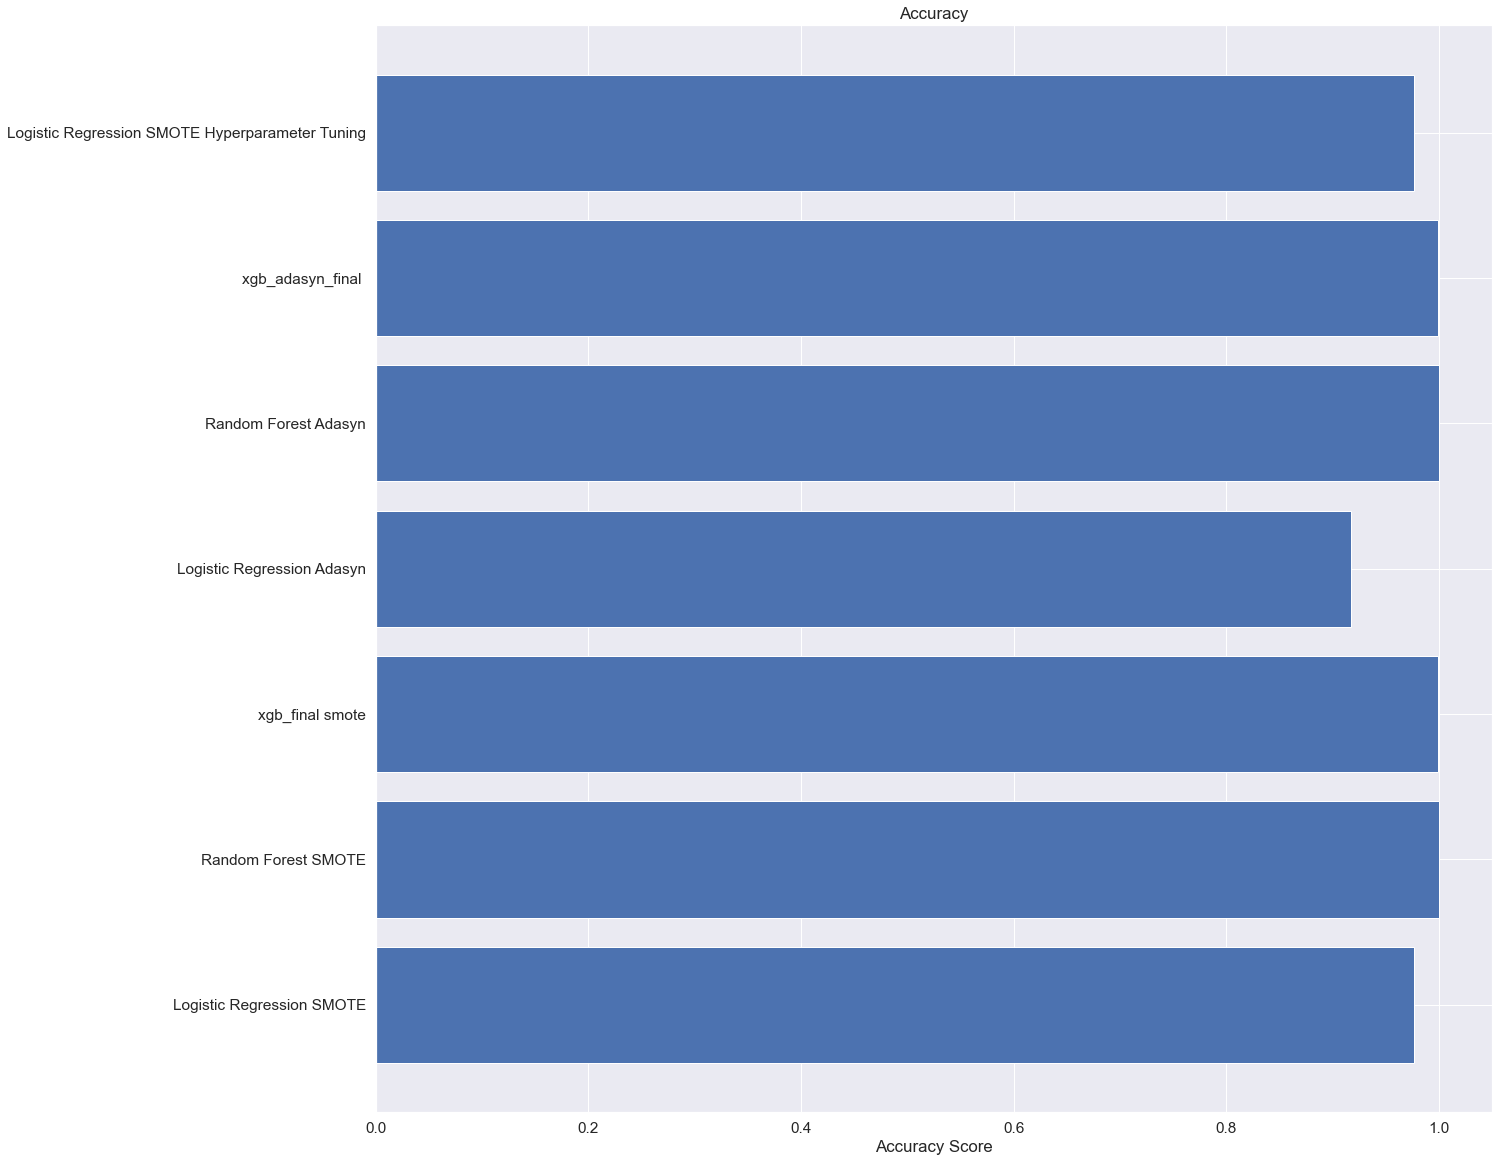

In [149]:
plt.title('Accuracy')
pyplot.barh(range(len(Prediction_Accuracy)), list(Prediction_Accuracy.values()), align='center')
pyplot.yticks(range(len(Prediction_Accuracy)), list(Prediction_Accuracy.keys()))
pyplot.xlabel('Accuracy Score')

Text(0.5, 0, 'Recall Score')

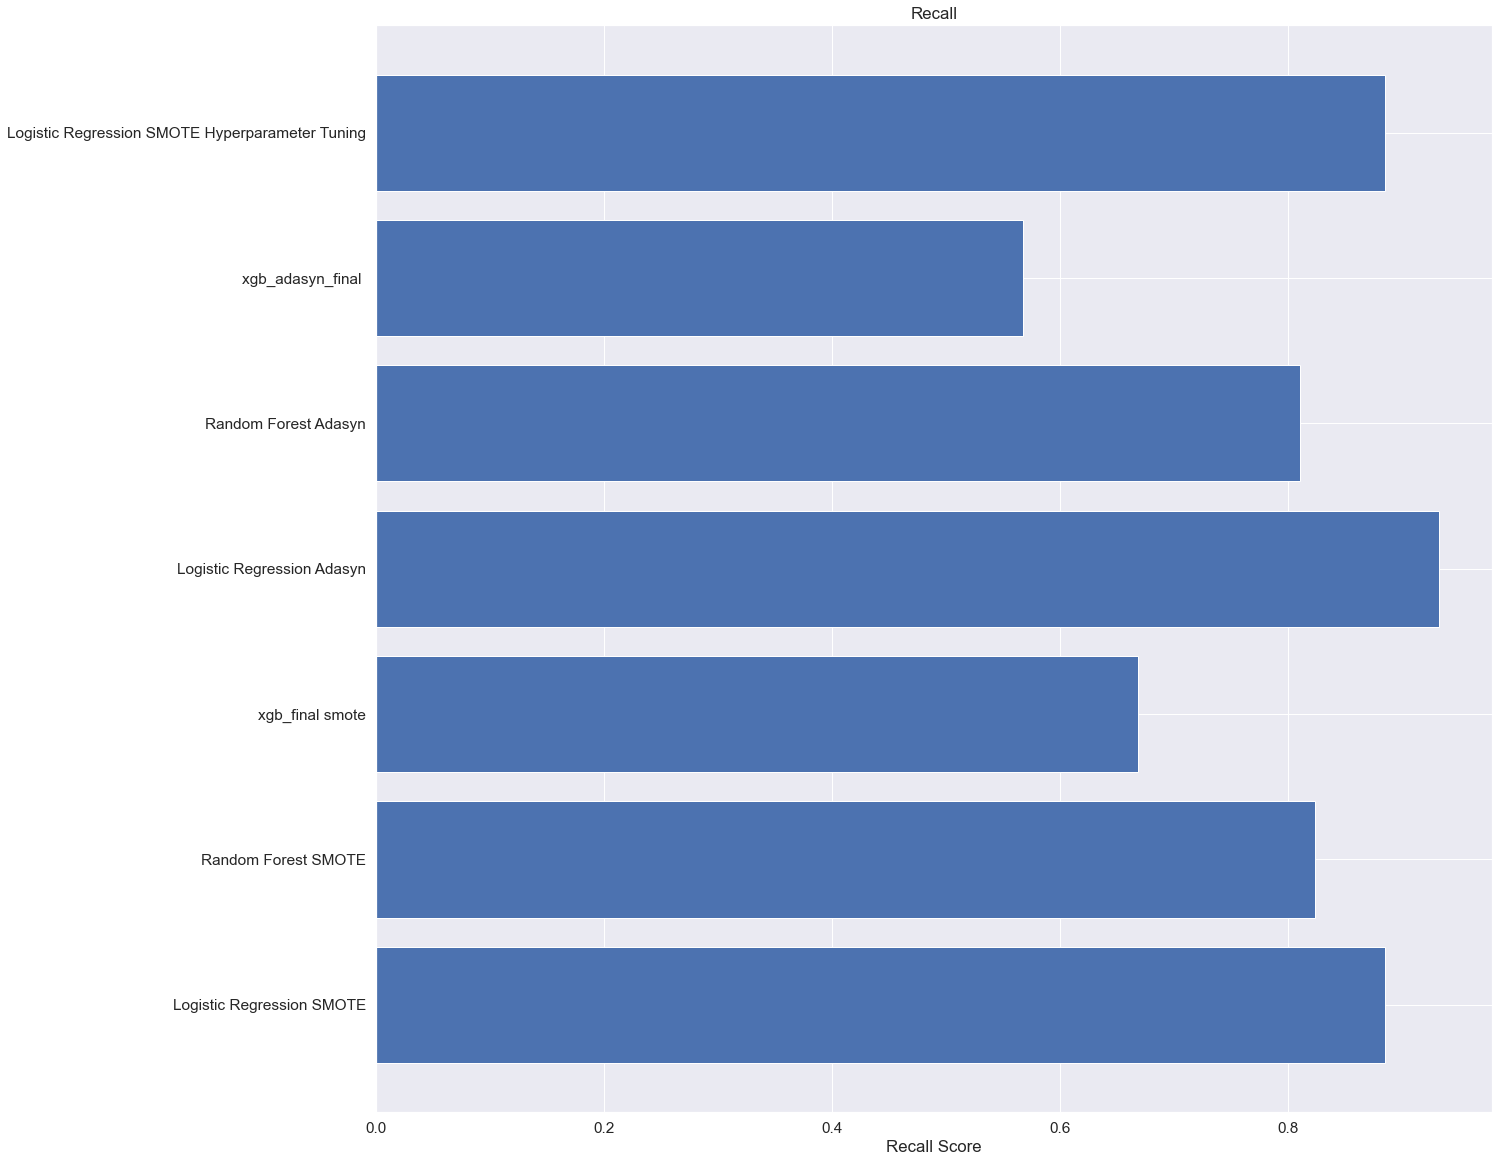

In [150]:
plt.title('Recall')
plt.barh(range(len(Prediction_Recall)), list(Prediction_Recall.values()), align='center')
plt.yticks(range(len(Prediction_Recall)), list(Prediction_Recall.keys()))
plt.xlabel('Recall Score')

We can see that logistic regression after applying ADASYN is the best model with recall of value 93.2432.

### Print the important features of the best model to understand the dataset

In [32]:
clf=lr_adasyn

In [33]:
rf_probs = clf.predict_proba(X_test)[:, 1]
var_imp = {}


rfe = RFE(clf, 3)
fit = rfe.fit(X_train_adasyn, y_train_adasyn)

In [34]:
cols = X_train.columns[fit.support_]
print("The top features are : ",cols)

The top features are :  Index(['V4', 'V12', 'V14'], dtype='object')


In [35]:
top_var_index = X_train.columns.get_loc('V4')
print(top_var_index)
second_top_var_index = X_train.columns.get_loc('V12')
print(second_top_var_index)

3
11


Top var = 4
2nd Top var = 12
3rd Top var = 14


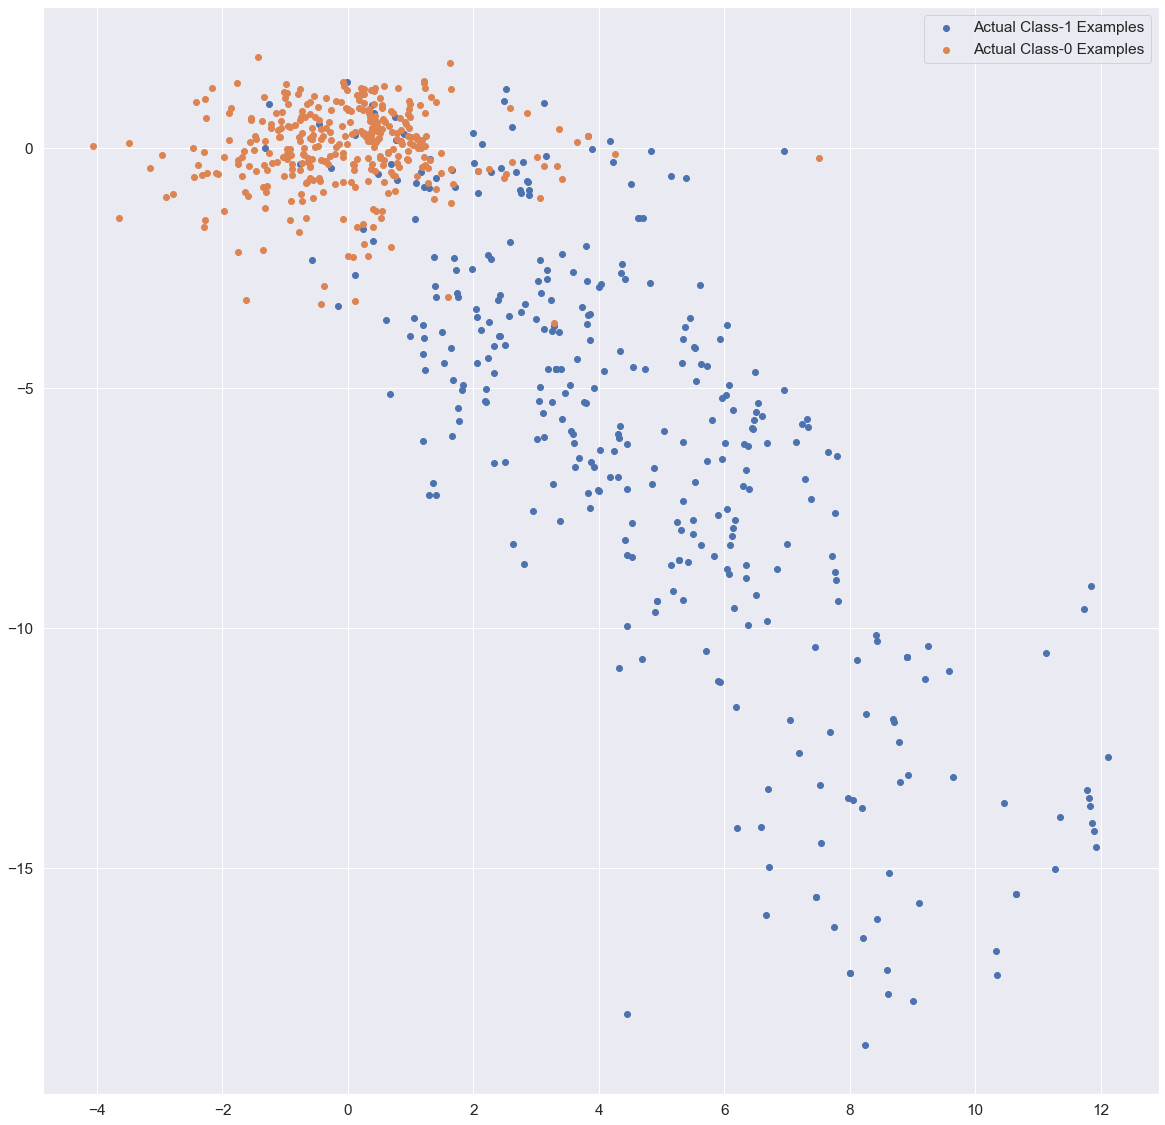

In [36]:
print('Top var =', X_train.columns.get_loc('V4')+1)
print('2nd Top var =', X_train.columns.get_loc('V12')+1)
print('3rd Top var =', X_train.columns.get_loc('V14')+1)

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

np.random.shuffle(X_train_0)

%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()

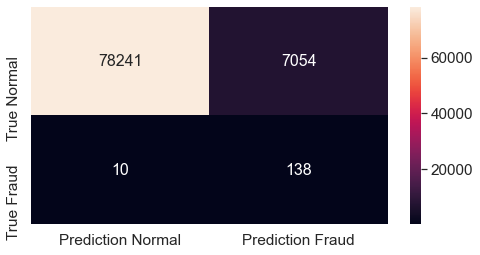

In [37]:
#### Print the FPR,TPR & select the best threshold from the roc curve
lr_cm_adasyn = pd.DataFrame(lr_cm_adasyn, ['True Normal','True Fraud'],['Prediction Normal','Prediction Fraud'])
pyplot.figure(figsize = (8,4))
sns.set(font_scale=1.4)
sns.heatmap(lr_cm_adasyn, annot=True,annot_kws={"size": 16},fmt='g')

In [38]:
print('Train auc =', metrics.roc_auc_score(y_test, lr_predict_adasyn))
fpr, tpr, thresholds = metrics.roc_curve(y_test, lr_predict_adasyn)
threshold = thresholds[np.argmax(tpr-fpr)]
print(threshold)

Train auc = 0.9248656094983547
1


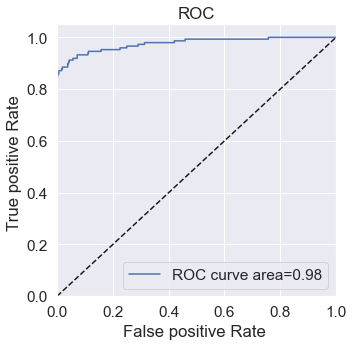

In [39]:
# Function to draw AUC curve
def draw_roc(actual,probs):
    fpr,tpr,thresholds=metrics.roc_curve(actual,probs,drop_intermediate=True)
    auc_score=metrics.roc_auc_score(actual,probs)
    plt.figure(figsize=(5,5))
    plt.plot(fpr,tpr,label="ROC curve area=%0.2f" % auc_score)
    plt.plot([0,1],[0,1],'k--')
    plt.xlim([0,1])
    plt.ylim([0,1.05])
    plt.xlabel('False positive Rate ')
    plt.ylabel('True positive Rate ')
    plt.title('ROC')
    plt.legend(loc="lower right")
    plt.show()
    return None

draw_roc(y_test, rf_probs)

In [40]:
# Converting the y_test values to dataframe
pred_series = pd.Series(lr_predict_adasyn)
pred_df = pd.DataFrame(pred_series)
pred_df.reset_index(drop=True, inplace=True)

In [41]:
# Concatenating the X_test and y_test
final_df = pd.concat([X_test_copy, y_test_copy], axis = 1)
final_df.reset_index(drop=True, inplace = True)
final_df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-0.548103,1.376074,0.051147,4.300577,1.761938,0.081805,1.788166,-0.302164,-2.941339,1.393164,...,0.316647,0.700714,-0.532490,-0.680250,1.232858,0.980223,-0.042880,0.053000,101.42,0
1,0.437324,1.824381,-2.299325,1.538479,0.791887,-1.414298,0.482083,0.339477,-0.674650,-1.234870,...,-0.077049,-0.170282,0.108469,-0.365513,-0.436975,-0.393859,0.121535,-0.061320,9.99,0
2,2.056846,0.042030,-1.296059,0.368958,0.032669,-1.349797,0.334441,-0.463096,0.452703,-0.016376,...,0.261879,0.949829,-0.018148,0.109873,0.295611,-0.115295,-0.015115,-0.054976,10.49,0
3,-0.497480,0.785269,1.695245,-0.644791,0.491553,0.430883,0.510721,0.053386,0.552390,-0.545978,...,-0.280792,-0.548862,-0.367317,-0.044278,0.430846,-0.657662,0.179848,-0.081837,1.00,0
4,1.611949,-0.938343,-1.200421,0.653356,-0.386518,-0.465937,0.069881,-0.147945,0.849526,0.005008,...,0.081319,-0.184030,0.065733,0.742927,-0.283315,0.172087,-0.091352,-0.009690,227.75,0


In [42]:
# Concatenating Predictions
final_df = pd.concat([final_df, pred_df.rename(columns = {0:'Prediction'})], axis = 1)
final_df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,Prediction
0,-0.548103,1.376074,0.051147,4.300577,1.761938,0.081805,1.788166,-0.302164,-2.941339,1.393164,...,0.700714,-0.532490,-0.680250,1.232858,0.980223,-0.042880,0.053000,101.42,0,1
1,0.437324,1.824381,-2.299325,1.538479,0.791887,-1.414298,0.482083,0.339477,-0.674650,-1.234870,...,-0.170282,0.108469,-0.365513,-0.436975,-0.393859,0.121535,-0.061320,9.99,0,1
2,2.056846,0.042030,-1.296059,0.368958,0.032669,-1.349797,0.334441,-0.463096,0.452703,-0.016376,...,0.949829,-0.018148,0.109873,0.295611,-0.115295,-0.015115,-0.054976,10.49,0,0
3,-0.497480,0.785269,1.695245,-0.644791,0.491553,0.430883,0.510721,0.053386,0.552390,-0.545978,...,-0.548862,-0.367317,-0.044278,0.430846,-0.657662,0.179848,-0.081837,1.00,0,0
4,1.611949,-0.938343,-1.200421,0.653356,-0.386518,-0.465937,0.069881,-0.147945,0.849526,0.005008,...,-0.184030,0.065733,0.742927,-0.283315,0.172087,-0.091352,-0.009690,227.75,0,0


### Analysis

In [51]:
print("The total amount of fraudulent transactions correctly predicted: Rs. {:.2f} ".format(sum(final_df[(final_df['Prediction']==1 )& (final_df['Class']==1)]['Amount'])))

print("The total amount of fraudulent transactions which were not predicted as fraudulent: Rs. {:.2f} ".format(sum(final_df[(final_df['Prediction']==0 )& (final_df['Class']==1)]['Amount'])))


The total amount of fraudulent transactions correctly predicted: Rs. 15029.47 
The total amount of fraudulent transactions which were not predicted as fraudulent: Rs. 2423.84 


A logistic regression after applying ADASYN is the best model with recall of value 93.2432.